# Python for Data Analysis

Book:
http://wesmckinney.com/pages/book.html

GitHub:
https://github.com/wesm/pydata-book

## 0. Terminology

* Time series: a series of data points listed in time order
* Data munging/wrangling/munge: transforming messy data into a structured format for processing
* Element-wise: perform on every element (e.g., in an array)
* Quantile: A sample divided into equal-sized parts. E.g., a percentile is a quantile that divides a distribution into 100-equal sized parts.
* Discretization: The process of breaking something down into discrete parts so, e.g., it can be measured/calculated. You might have a formula expressed in terms of time, but you can't measure it for ALL time, since time could theoretically be broken down into an infinite number of parts. So instead you break it down into _discrete_ measurements of 5 seconds, or whatever.
* Binning: Grouping data into bins. For example, instead of having every single age in your survey, you have 18-25, etc.
* Dimensional table: a data warehousing optmization approach. Store unique items in an array, store integer keys referencing those items.
* One-hot encoding: Essentially the binary encoding of category data. E.g., instead of having Honda=1, Toyota=2, Ford=3, you would have is_honda={0,1}, is_toyota={0,1}, etc. This is so that machine learning training models calculations don't mess up by using higher numbers for certain categories.
* Imputation: Filling in missing data with substituted values. E.g., fill in missing ages with the mean of all the ages.

## 1. Libraries Overview

* NumPy
    * `ndarray` -- fast multidimensional array
    * C interop
    * Linear algebra operations
    * More efficient arrays
    
    
* pandas
    * High-level data structures for working with structured data
    * In particular `DataFrame` and `Series`
    
    
* matplotlib
    * Produces plots and other 2D data visulizations
    
    
* scipi
    * Various scientific computing functions
    * E.g., statistical tests, etc.
    
    
* scikit-learn
    * General-purpose machine learning
    
    
* statsmodels
    * Classical statistics and econometric algorithms
    


## 2. Import conventions
It's bad practice to import everything, like:
`from numpy import *`

This will take in a huge package (snigger).

Instead, the following import conventions are used:

    * `import numpy as np`
    * `import matplotlib.pyplot as plt`
    * `import pandas as pd`
    * `import seaborn as sns`
    * `import statsmodel as sm`
    
This allows you to call, say, `np.arange`, so you can clearly see `.arange` is coming from the `np` package.

## 3. Python Reminder/Tips
This section just contains some points that weren't covered in the previous Python tutorial.

### 3.1 Object Introspection

In [39]:
# Use ? to find out information about an object,
# or to show a function's docstring

my_list = [1, 2, 3]

my_list?

my_list.insert?

### 3.2 %run/%load
Use %run or %load (Jupyter) to run a .py script.

In [10]:
# %run test_script.py

# %load test_script.py

### 3.3 Magic Commands
Magic commands are special IPython commands not available in Python itself.

They are prefixed by %.

E.g., `%timeit`

You can use ? with these commands too.

Use the following to get a list of magic commands:

`%quickref`
`%magic`

In [15]:
# Enter debugger
%debug?

# Delete all defined variables/names
%reset

# Pretty-print the object and display it via pager
%page OBJECT

# Delete a variable and attempt to clear al references to it
%xdel VARIABLE

# Let's you see matplotlibs in Jupyter
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.
Object `OBJECT` not found
NameError: name 'VARIABLE' is not defined
Using matplotlib backend: MacOSX


ERROR:tornado.application:Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x10e7e2f28>)
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 605, in _run_callback
    ret = callback()
  File "/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 265, in enter_eventloop
    self.eventloop(self)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/eventloops.py", line 277, in loop_cocoa
    show.mainloop()
AttributeError: 'function' object has no attribute 'mainloop'


### 3.4 matplotlib in Jupyter

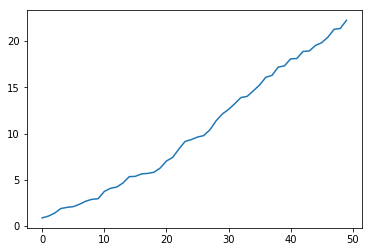

In [17]:
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(np.random.rand(50).cumsum())

### 3.5 Keyword Arguments
Functions can take keyword arguments.

In [22]:
def my_func(x, y, z):
    print("x is {}, y is {}, and z is {}".format(x, y, z))
    
my_func(x=3, z=10, y = 2)

x is 3, y is 2, and z is 10


### 3.6 Binding
Assigning is sometimes referred to as __binding__, and variables that have been assigned may be referred to as __bound variables__.

### 3.7 Checking conformity
As well as using isinstance, you can define a function to check if something implements a certain protocol, throwing an error if it does not.

In [26]:
def isiterable(obj):
    try:
        iter(obj)
        return True
    except TypeError:
        return False

x = 5

if not isinstance(x, list) and isiterable(x):
    x = list(x)
    
print(x)

5


### 3.8 Scalar Value Types
I.e., primitive types

* None
* str
* bytes
* float
* bool
* int

### 3.9 Interpret characters as-is
Use r before the string. (I.e., don't interpret the characters as escape characters.) Like @ in C#.

In [28]:
my_str = r"this string\does not contain\special characters."

print(my_str)

this string\does not contain\special characters.


### 3.10 Printing readable date strings
Use `.strftime(...)`.

In [33]:
from datetime import datetime, date, time

dt = datetime(2017, 1, 21, 20, 30, 21)
dt.strftime('%m/%d/%y %H:%M')

'01/21/17 20:30'

### 3.12 Extracting variables
When unpacking variables, you can use the `*rest` keyword to get the remaining arguments. Note, rest here is just an example and can be anything, such as an underscore (_).

In [35]:
my_list = 1, 2, 3, 4, 5

a, b, *rest = my_list

print(a, b)

print(rest)

1 2
[3, 4, 5]


### 3.13 Sort Keys

In [38]:
my_list = ["he", "ate", "a", "great", "hotdog"]

my_list.sort(key=len)

print(my_list)

['a', 'he', 'ate', 'great', 'hotdog']


### 3.14 Understanding nested comprehension
This is just a nice example.

In [3]:
some_tuples = ((1,2,3),(4,5,6),(7,8,9))

flattened = [x for tup in some_tuples for x in tup]

print(flattened)

# This is the same as:

flattened = []

for tup in some_tuples:
    for x in tup:
        flattened.append(x)
        
print(flattened)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


### 3.15 Using a list of functions to clean strings 

In [8]:
import re

# Just another nice example
def remove_punctuation(str):
    return re.sub("[!#?]", "", str)
                  
                  
def clean_strings(strings, ops):
    result = []
    for value in strings:
        for function in ops:
            value = function(value)
        result.append(value)
    return result
                  
states = ["    alabama", "Georgia!", "West Virginia?  "]
clean_ops = [str.strip, remove_punctuation, str.title]              
    
clean_strings(states, clean_ops)

['Alabama', 'Georgia', 'West Virginia']

### 3.16 itertools
The `itertools` module has a collection for generators, such as groupby, combinations, etc. Similar to LINQ statements in C#.

In [14]:
import itertools

first_letter = lambda x: x[0]

names = ["Adam", "Alan", "Jennifer", "Josie", "James"]

for letter, names in itertools.groupby(names, first_letter):
    print(letter, list(names)) # Names is a generator

('A', ['Adam', 'Alan'])
('J', ['Jennifer', 'Josie', 'James'])


## 2. NumPy Basics

A few points about NumPy:
    
* Data is stored in a contiguous block in memory
* NumPy's algorithms written in C can operate on this without type checking
* NumPy arrays use less memory than built-in Python sequences



In [3]:
# Here's a comparison

import numpy as np

np_array = np.arange(1000000)

python_list = list(range(1000000))


%time for _ in range(10): np_array2 = np_array * 2
    
%time for _ in range(10): python_list2 = [x * 2 for x in python_list]

Wall time: 26 ms
Wall time: 1.13 s


And numpy arrays use less memory too.

### 2.1 ndarray
ndarray is a fast, N-dimensional array object.
You can perform mathematical operations on the every element with similar syntax to that you would use with scalar elements (e.g., above where we could just do `array * 2` to multiply every element in the array by 2, instead of needing a for composition).

Every element in ndarray must be of the same type.

In [4]:
# Here is a 2 by 3 array with random data.

import numpy as np

random_two_by_three = np.random.randn(2, 3)

random_two_by_three

array([[ 1.47636454,  0.58560396,  0.08390403],
       [ 1.39940735, -0.60260737,  0.85310421]])

In [7]:
# I can then multiply every element by 10
random_two_by_three * 10

array([[ 14.76364544,   5.85603959,   0.83904029],
       [ 13.99407348,  -6.02607369,   8.53104209]])

In [8]:
# Or add it with something else, like itself
random_two_by_three + random_two_by_three

array([[ 2.95272909,  1.17120792,  0.16780806],
       [ 2.7988147 , -1.20521474,  1.70620842]])

In [16]:
# Use shape to get the rows/columns of the array
print(random_two_by_three.shape)

# Use ndim to get the dimensions
print(random_two_by_three.ndim)

# And use dtype to get the data type stored in the array
print(random_two_by_three.dtype)

(2L, 3L)
2
float64


#### 2.1.1 Creating ndarrays

In [13]:
# 1. Use the array function
my_data = [1, 2, 3, 4, 5]

my_np_arr = np.array(my_data)

my_np_arr

array([1, 2, 3, 4, 5])

In [15]:
# 2. Nested sequences will be converted into multidimensional arrays
nested_sequence = [[1, 2, 3], [4, 5, 6]]

np_arr = np.array(nested_sequence)

np_arr

array([[1, 2, 3],
       [4, 5, 6]])

In [35]:
# 3. Use other functions like zeros, one, or empty to create arrays with these default values.
#    Pass in tuples with dimensions as arguments.
multi_dim_zero_array = np.zeros((3, 3))

print(multi_dim_zero_array)

identity = np.identity(3) # Note, just a single argument

print(identity)

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [23]:
# 4. arange is like Python's range function, but it passes back an np array instead of a list
aranged_arr = np.arange(10)

aranged_arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
# 5. "like" functions create an ndarray with the same shape and type
nested_sequence = [[1, 2, 3], [4, 5, 6]]
np_arr = np.array(nested_sequence)

print(np_arr)

like_arr = np.ones_like(np_arr)

print(like_arr)

[[1 2 3]
 [4 5 6]]
[[1 1 1]
 [1 1 1]]


In [39]:
# 6. Fill an array FULL of values
filled_arr = np.full((2, 3), 6)

filled_arr

array([[6, 6, 6],
       [6, 6, 6]])

#### 2.1.2 ndarray data types

In [42]:
# 1. Cast an array of strings to floats
number_strings = np.array(["2.64", "1.43", "5.6"], dtype=np.string_)

float_arr = number_strings.astype(float)

float_arr

array([ 2.64,  1.43,  5.6 ])

#### 2.1.3 NumPy array arithmetic
You can perform arithmetic operations on arrays without writing for loops.

In NumPy, this is called __vectorization__. (Specifically, vectorization refers to using some array expression to accomplish your task, instead of writing a for loop.)

In [46]:
arr = np.array([[1, 2, 3,], [4, 5, 6]])

arr

array([[1, 2, 3],
       [4, 5, 6]])

In [49]:
arr * 3

array([[ 3,  6,  9],
       [12, 15, 18]])

In [50]:
arr + arr

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [51]:
arr * arr

array([[ 1,  4,  9],
       [16, 25, 36]])

In [53]:
1.0/arr

array([[ 1.        ,  0.5       ,  0.33333333],
       [ 0.25      ,  0.2       ,  0.16666667]])

In [54]:
arr ** 0.5

array([[ 1.        ,  1.41421356,  1.73205081],
       [ 2.        ,  2.23606798,  2.44948974]])

In [57]:
# You can also use Boolean operations, which will compare each element in the array
arr2 = np.array([[1, 5, 2], [2, 7, 9]])

arr2 < arr

array([[False, False,  True],
       [ True, False, False]], dtype=bool)

#### 2.1.4 Indexing and slicing
If you take a slice of an array and assign a scalar value to it, this is known as __broadcasting__. The value is __broadcasted__ to that slice.

In [59]:
# Broadcasting example
arr = np.arange(10)

arr[4:6] = 9

arr

array([0, 1, 2, 3, 9, 9, 6, 7, 8, 9])

Important difference:
When you take a slice of an ndarray, the slice refers to the original array elements.
The data is NOT copied.

This slice is known as a __view__.

In [69]:
arr = np.arange(10)

# Take a slice
my_slice = arr[0:5]

print(my_slice)

# Change the first element of my slice
my_slice[0] = 10

# The change is reflected in the original array
print(arr)

# Or we could change every value in this slice
my_slice[:] = 1

print(arr)

[0 1 2 3 4]
[10  1  2  3  4  5  6  7  8  9]
[1 1 1 1 1 5 6 7 8 9]


In [70]:
# But if you want, you CAN take a copy too.
my_slice = arr[8:10].copy()

my_slice[:] = 0

print(my_slice)
print(arr)

[0 0]
[1 1 1 1 1 5 6 7 8 9]


In [74]:
# 2D arrays can be accessed using the usual [][] syntax, or by commas
arr = np.array([[1, 2, 3], [4, 5, 6]])

print(arr)

print(arr[0][1]) # ==
print(arr[0, 1])

[[1 2 3]
 [4 5 6]]
2
2


In [79]:
# Note on multidimensional arrays.
# We can also get, say, 2 x 2 x 3 arrays. This means an 2 (2 by 3) arrays.
higher_dim_arr = np.array([[[1, 2, 3], [4, 5, 6]], [[3, 2, 1], [6, 5, 3]]])

print(higher_dim_arr)

# So calling just one index will get you the first array
print(higher_dim_arr[0])

# And you can assign values to just this
higher_dim_arr[0] = 1

print(higher_dim_arr)

[[[1 2 3]
  [4 5 6]]

 [[3 2 1]
  [6 5 3]]]
[[1 2 3]
 [4 5 6]]
[[[1 1 1]
  [1 1 1]]

 [[3 2 1]
  [6 5 3]]]


#### Slicing in 2D
Slicing in 2D is pretty logical. You just have to remember the syntax.

In [83]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(arr2d)

slice2d = arr2d[:2] # Take first 2 rows (up to row index at 2 -- the 3rd row)

print(slice2d)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]]


In [90]:
# First arg = select all rows, second arg: select up to column 1
col1 = arr2d[:, :1]
print(col1)

# Take from row 1, up to col 2 (the third col)
sub_arr = arr2d[1:, :2]
print(sub_arr)

[[1]
 [4]
 [7]]
[[4 5]
 [7 8]]


#### 2.1.5 Boolean indexing
We can use a Boolean condition to select array indices.

Suppose we had some names and an array of data.
And imagine every row in the array corresponds to one of the names.

In [92]:
# Array of names
names = np.array(["Bob", "James", "Tim", "Sally", "Trish", "Sara", "Jesse"])

data = np.random.randn(7, 4)

print(names)
print(data)

['Bob' 'James' 'Tim' 'Sally' 'Trish' 'Sara' 'Jesse']
[[-0.74976441 -1.44286506 -0.49599846 -1.28430698]
 [ 0.21163118 -0.31702432  1.02055599  0.12360032]
 [ 0.02082039 -1.94356852 -0.92712085  0.57247121]
 [ 1.85835009  1.66578352  0.50968336  1.26967872]
 [-0.42728919 -1.88049417  1.26696286 -0.00519333]
 [-0.74430498  2.00097006 -0.10675513  0.72826767]
 [-1.41578149  1.30536751  0.12695225 -1.89775707]]


In [94]:
# We can then get the elements/index of the array that correspond to a certain name
# I.e., the True is in index 2, where Tim is.
names == "Tim"

array([False, False,  True, False, False, False, False], dtype=bool)

In [96]:
# So, we can pass this into data, to get Tim's corresponding row
# I.e., get the index of names that corresponds to Tim, and then pass this into data
data[names == "Tim"]

array([[ 0.02082039, -1.94356852, -0.92712085,  0.57247121]])

In [98]:
# You could also combine this to get a certain column/columns with slicing
data[names == "Tim", 3]

array([ 0.57247121])

In [100]:
# Likewise, you can negate the condition using != or ~ to get everything EXCEPT Tim's data
data[~(names == "Tim")]

array([[-0.74976441, -1.44286506, -0.49599846, -1.28430698],
       [ 0.21163118, -0.31702432,  1.02055599,  0.12360032],
       [ 1.85835009,  1.66578352,  0.50968336,  1.26967872],
       [-0.42728919, -1.88049417,  1.26696286, -0.00519333],
       [-0.74430498,  2.00097006, -0.10675513,  0.72826767],
       [-1.41578149,  1.30536751,  0.12695225, -1.89775707]])

__Note:__ `and` and `or` won't work with Boolean indexing. Using `&` and `|` instead:

In [102]:
data[(names == "Tim") | (names == "Sara")]

array([[ 0.02082039, -1.94356852, -0.92712085,  0.57247121],
       [-0.74430498,  2.00097006, -0.10675513,  0.72826767]])

__Note:__ Selecting array elements using Boolean conditionals ALWAYS creates a copy of the data.

In [105]:
# We can also use Boolean conditionals to set data
# E.g., floor to 0
data[data < 0] = 0

print(data)

[[ 0.          0.          0.          0.        ]
 [ 0.21163118  0.          1.02055599  0.12360032]
 [ 0.02082039  0.          0.          0.57247121]
 [ 1.85835009  1.66578352  0.50968336  1.26967872]
 [ 0.          0.          1.26696286  0.        ]
 [ 0.          2.00097006  0.          0.72826767]
 [ 0.          1.30536751  0.12695225  0.        ]]


In [107]:
# Or to set values for a user
data[names == "Tim"] = 7

print(data)

[[ 0.          0.          0.          0.        ]
 [ 0.21163118  0.          1.02055599  0.12360032]
 [ 7.          7.          7.          7.        ]
 [ 1.85835009  1.66578352  0.50968336  1.26967872]
 [ 0.          0.          1.26696286  0.        ]
 [ 0.          2.00097006  0.          0.72826767]
 [ 0.          1.30536751  0.12695225  0.        ]]


#### 2.1.6 Fancy indexing
_fancy indexing_ refers to indexing using an integer array.

Fancy indexing will always return a 1D array.

Like Boolean indexing, fancy indexing will always create a copy of the data.

In [110]:
# Take an array like this:
arr = np.empty((8,4))

for i in range(8):
    arr[i] = i
    
print(arr)

[[ 0.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 2.  2.  2.  2.]
 [ 3.  3.  3.  3.]
 [ 4.  4.  4.  4.]
 [ 5.  5.  5.  5.]
 [ 6.  6.  6.  6.]
 [ 7.  7.  7.  7.]]


In [112]:
# Then we can use fancy indexing to select a subset of rows in a particular order.
# E.g., to select 6 and 3:
subset = arr[[6, 3]]

print(subset)

[[ 6.  6.  6.  6.]
 [ 3.  3.  3.  3.]]


In [113]:
# reshape -- change the dimension of an array
arr = np.arange(32).reshape((8, 4))

print(arr)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


In [117]:
# If you pass in two arrays, you get back a 1D array where the first array specifies the row, and the second the column.
arr1d = arr[[0, 7], [3, 0]]

# 3 = [0,3]
# 4 = [7,0]
print(arr1d)

[ 3 28]


#### 2.1.7 Transposing
Arrays have a `transpose` method and a `T` attribute.

In [154]:
arr = np.arange(15).reshape(3, 5)

print(arr)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [148]:
# Get the transpose
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [149]:
# Just accessing the parameter doesn't affect the underlying array, obviously.
print(arr)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [157]:
# Higher dimension arrays can also be transposed
# (2 2x4 matrices)
arr = np.arange(16).reshape(2, 2, 4)
print(arr)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


In [158]:
# Swap the axes within the arrays
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

In [159]:
print(arr)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


In [161]:
# Transpose is a bit more complex in higher dimensions
arr = np.arange(16).reshape(2, 2, 4)
print(arr)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


In [163]:
# Here, we feed in how we want to permute the axes.
# For example, if we think of our axes as (x, y, z). I.e., the x = matrix to choose, y = row to choose, z = column to choose
# Then, (0, 1, 0) = 4 in our original matrix.
# Now, into transpose we pass (1, 0, 2). It's like saying, make (x, y, z) into (y, x, z)
# So (0, 1, 0) = 4, means 4 changes to position (1, 0, 0) -- second matrix, first row, first col.
# Whew!
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

### 2.2 Universal functions
Aka `ufunc`.

These functions vectorize -- perform some operation on all of the elements without needing a for loop -- on all the elements in an array.

There are two types:

* Unary functions: operate on one array
* Binary functions: operate on two arrays

List of available ufuncs: https://docs.scipy.org/doc/numpy-1.13.0/reference/ufuncs.html#available-ufuncs

In [165]:
arr = np.arange(10)
print(arr)

[0 1 2 3 4 5 6 7 8 9]


In [166]:
np.sqrt(arr)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ])

In [168]:
np.exp(arr)

array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03])

In [169]:
x = np.array([1, 2, 4])

y = np.array([3, 1, 2])

np.maximum(x, y)

array([3, 2, 4])

In [174]:
# Ufuncs can take an out parameter to operate on the array in-place

arr = np.array([1.0, 2.0, 3.0])
np.sqrt(arr)

print(arr)

np.sqrt(arr, arr)
print(arr)

[ 1.  2.  3.]
[ 1.          1.41421356  1.73205081]


### 2.3 Array-Oriented Programming
With NumPy, we can often replace for loops with some concise array expression.
In other words, we can perform _vectorization_ -- replacing for loops with some array expression.

In [198]:
# To look at this example, we must understand meshgrid.
# Meshgrid takes 2 1D arrays and turns them into a grid.
# This would be a 10x5 grid.
x_points = np.arange(10)
y_points = np.arange(5)

print(x_points)
print(y_points)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4]


In [199]:
# Get all the x points and y points
xs, ys = np.meshgrid(x_points, y_points)

In [200]:
# 5 rows of 10 dots (5 = y dimension)
xs

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [201]:
# 10 columns of 5 dots (10 = x dimension)
ys

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]])

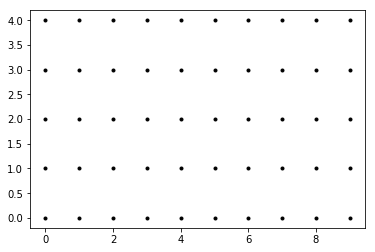

In [192]:
# If we draw it, it looks like this:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xs,ys, marker='.', color='k', linestyle='none')

In [204]:
# Now, if we wanted to find sqrt(x^2 + y^2), we just do:
z = np.sqrt(xs^2 + ys^2)

print(z)

# The point is, we did it all using array operations -- there were no for loops.

[[ 0.          1.          1.41421356  1.73205081  2.          2.23606798
   2.44948974  2.64575131  2.82842712  3.        ]
 [ 1.          0.          1.73205081  1.41421356  2.23606798  2.
   2.64575131  2.44948974  3.          2.82842712]
 [ 2.44948974  2.64575131  2.          2.23606798  1.41421356  1.73205081
   0.          1.          3.74165739  3.87298335]
 [ 2.64575131  2.44948974  2.23606798  2.          1.73205081  1.41421356
   1.          0.          3.87298335  3.74165739]
 [ 2.          2.23606798  2.44948974  2.64575131  0.          1.
   1.41421356  1.73205081  3.46410162  3.60555128]]


In [207]:
# The where condition can be used to get filtered data
x_arr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
y_arr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

conditions = np.array([True, True, False, False, True])

# If True, take from x_arr, else, take from y_arr
result = np.where(conditions, x_arr, y_arr)

result

array([ 1.1,  1.2,  2.3,  2.4,  1.5])

In [210]:
# Another where example: imagine we wanted everything -ve to be -2, and everything +ve to be 2.

arr = np.random.randn(4, 4)
arr

array([[-0.72923974, -2.03837278, -0.96654509,  1.7903514 ],
       [ 0.82098975, -0.24916209, -0.28642331,  0.99524732],
       [ 2.27167346, -1.06800021,  0.15132695,  1.17992048],
       [-0.86194962, -1.3309561 , -0.66236043, -1.05764893]])

In [211]:
result = np.where(arr > 0, 2, -2)

result

array([[-2, -2, -2,  2],
       [ 2, -2, -2,  2],
       [ 2, -2,  2,  2],
       [-2, -2, -2, -2]])

In [212]:
# What if I only wanted to replace the positive values, and leave the rest alone?
# In this case, we can just pass in the array to the "else" part of the statement
arr = np.random.randn(4, 4)
arr

array([[ -2.62141956e-01,   3.63206390e-01,   1.58499414e-03,
         -8.20037558e-01],
       [ -5.20998062e-01,   1.38604317e+00,   3.56671927e-02,
          9.88523190e-01],
       [ -2.24099800e-02,   6.25422700e-01,  -6.15655484e-01,
         -1.50033677e+00],
       [  3.85942154e-01,   6.82148328e-01,   2.17148487e+00,
         -1.91187563e-01]])

In [213]:
result = np.where(arr > 0, 2, arr)
result

array([[-0.26214196,  2.        ,  2.        , -0.82003756],
       [-0.52099806,  2.        ,  2.        ,  2.        ],
       [-0.02240998,  2.        , -0.61565548, -1.50033677],
       [ 2.        ,  2.        ,  2.        , -0.19118756]])

#### 2.3.1 Mathematical & statistical methods

In [214]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [215]:
arr.mean()

4.5

In [216]:
arr.sum()

45

In [218]:
arr = np.arange(9).reshape(3, 3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [221]:
# Supply an axis argument to get the sum of each row in another, 1D, array
arr.sum(axis=1)

array([ 3, 12, 21])

In [223]:
# Or we could do axis=0 to sum the columns
arr.sum(axis=0)

array([ 9, 12, 15])

Slightly confusing reversal of the row/column standard. For clarity:

* `axis=0` == compute down the rows (i.e., the columns)
* `axis=1` == computer across the columns (i.e., the rows)

#### 2.3.2 Sorting
You can sort an axis of a multdimensional array by passing an axis into sort.

In [224]:
arr = np.random.randn(4, 4)
arr

array([[ 0.67985615,  0.4467615 ,  0.98179096,  0.89242437],
       [ 0.0086968 ,  0.9241127 ,  0.59112928,  0.93030476],
       [ 0.82821186,  0.38144211,  0.23559007,  1.36495571],
       [ 0.30221386,  0.12111979, -0.25221855,  0.22984603]])

In [227]:
# Sort across the columns
arr.sort(1)
arr

array([[ 0.4467615 ,  0.67985615,  0.89242437,  0.98179096],
       [ 0.0086968 ,  0.59112928,  0.9241127 ,  0.93030476],
       [ 0.23559007,  0.38144211,  0.82821186,  1.36495571],
       [-0.25221855,  0.12111979,  0.22984603,  0.30221386]])

In [228]:
arr = np.random.randn(4, 4)
arr

array([[ 0.51275434, -0.39658362, -0.18785255,  0.78905677],
       [ 0.18243359, -0.10371522,  0.41654519, -1.25773565],
       [-0.2898797 , -1.60171387, -0.19392922, -1.61828443],
       [ 0.65298619, -1.42323186, -1.90427449, -1.56585265]])

In [230]:
# Sort down the rows
arr.sort(0)
arr

array([[-0.2898797 , -1.60171387, -1.90427449, -1.61828443],
       [ 0.18243359, -1.42323186, -0.19392922, -1.56585265],
       [ 0.51275434, -0.39658362, -0.18785255, -1.25773565],
       [ 0.65298619, -0.10371522,  0.41654519,  0.78905677]])

#### 2.3.3 Unique & Other set logic

In [232]:
# np.unique returns the sorted, unique values in an array.
names = np.array(["Tim", "Bob", "Bob", "Stewart", "Linda", "Steven", "Sara", "Alberta", "Steven"])

result = np.unique(names)

result

array(['Alberta', 'Bob', 'Linda', 'Sara', 'Steven', 'Stewart', 'Tim'],
      dtype='|S7')

In [233]:
# in1d tells you if the element belongs to some other array
arr = np.array([1, 0, 0, 7, 21, 5, 3, 2, 21])

np.in1d(arr, [7, 3, 1])

array([ True, False, False,  True, False, False,  True, False, False], dtype=bool)

### 2.4 Linear Algebra

In [8]:
import numpy as np

x = np.array([[2, 2,], [2, 2]])
y = np.array([[1, 2], [3, 4]])

print(x)
print(y)

[[2 2]
 [2 2]]
[[1 2]
 [3 4]]


In [10]:
# Unlike some languages, * performs ELEMENT-WISE multiplication -- not matrix multiplication as we know it.
# In other words, element (0, 0) in matrix x is multiplied by element (0, 0) in matrix y, etc.
x * y

array([[2, 4],
       [6, 8]])

In [12]:
# This performs matrix multiplication. Note, it's not a dot product, just a dot.
# I.e., the rows of x * cols of y
x.dot(y)

array([[ 8, 12],
       [ 8, 12]])

`numpy.linalg` can calculate matrix decompositions, inverse, determinant, etc. 

In [13]:
from numpy.linalg import inv, qr

In [26]:
x = np.array([[4, 7], [2, 6]])
x

array([[4, 7],
       [2, 6]])

In [30]:
# Reminder: The inverse is like the reciprocal for matrices.
# As we can multiply 8 * 1/8 to get 1, we multiply matrix A by its inverse to get I, the identity matrix. 
my_inv = inv(x)
my_inv

array([[ 0.6, -0.7],
       [-0.2,  0.4]])

In [34]:
my_inv.dot(x)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [37]:
# qr decompositon returns q = orthonormal, r = upper-triangle
x = np.random.randn(4, 4)
x

array([[ 0.93872419, -0.67983241,  0.43534016,  1.27334021],
       [ 0.51130548,  0.03496489,  0.14910232, -0.21279254],
       [-0.80673439,  1.30315786, -0.00311249,  0.27066436],
       [ 0.36980251,  0.37070423, -1.92163132, -0.60319632]])

In [39]:
q, r = qr(x)

# Reminder: orthonormal matrix = columns and rows are orthonormal vectors
#           orthogonal = all meet at 90 degrees, normal = length 1 = orthonormal
#           Makes it easier to find in terms of another basis, projection, etc.
q

array([[-0.67567158, -0.06396886, -0.38416518,  0.62593371],
       [-0.36802565, -0.42496319, -0.43149768, -0.70553041],
       [ 0.58066843, -0.63708777, -0.39242682,  0.32084972],
       [-0.26617514, -0.63986987,  0.7157011 ,  0.08654065]])

In [41]:
# Reminder: upper-triangle = only upper-right has values
#           upper-triangles let us use a trick -- we can just multiply down the diagonal to get a determinant
r

array([[-1.38932022,  1.10450584,  0.16066271, -0.46432457],
       [ 0.        , -1.03879909,  1.1403657 ,  0.22250507],
       [ 0.        ,  0.        , -1.60567205, -0.9352777 ],
       [ 0.        ,  0.        ,  0.        ,  0.98179976]])

### 2.5 Random numbers
`numpy.random` lets you generate arrays of random numbers with a given probability distribution.
It is also faster than Python's standard random-number generation for large sample generation.

In [43]:
# Normal distribution
normally_distributed_data = np.random.normal(size=(4, 4))

normally_distributed_data

array([[-0.48456418,  0.16150928, -0.59184648,  0.51013253],
       [ 1.01326564, -0.03618413, -0.20496228,  0.09087592],
       [ 0.39911377,  0.69558163, -1.77498029, -1.03743202],
       [ 0.1872146 , -0.35207145, -0.82949099, -2.22455098]])

In [44]:
# Change the seed
np.random.seed(123)

In [49]:
# numpy.random uses a global random seed. Use numpy.random.RandomState to create a generator
# isolated from others.
rng = np.random.RandomState(123)

rng.randn(10)

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025,
        1.65143654, -2.42667924, -0.42891263,  1.26593626, -0.8667404 ])

#### 2.5.1 Example: Random Walk
Reminder: a random walk is a sequence of random steps in some space, such as the integers.
For example, a random walk along the integer line might start at 0, and then take a step of -1 or +1 every time.

Here is an example of simulating a random walk such as this in numpy.

In [52]:
steps = 1000
random_values = np.random.randint(0, 2, size=steps)
# Get 1000 random values of 0 or 1
random_values

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0,

In [54]:
# Get all the steps we'll take on our walk
steps = np.where(random_values > 0, 1, -1)
steps

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1,
        1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,
       -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
       -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1,
       -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,
        1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
        1,  1,  1, -1, -1

In [57]:
# Get the walk itself
walk = steps.cumsum()
walk

array([  1,   2,   3,   4,   5,   4,   5,   6,   7,   6,   7,   6,   5,
         6,   7,   6,   7,   6,   7,   8,   9,  10,   9,   8,   7,   8,
         7,   8,   7,   8,   7,   8,   7,   6,   7,   8,   7,   6,   7,
         6,   5,   4,   5,   4,   5,   6,   7,   6,   7,   8,   9,  10,
        11,  12,  13,  12,  13,  12,  13,  14,  15,  16,  17,  16,  15,
        16,  17,  18,  17,  18,  19,  20,  19,  20,  19,  18,  19,  20,
        19,  20,  19,  20,  21,  22,  23,  24,  25,  24,  25,  24,  25,
        24,  23,  22,  21,  22,  23,  22,  23,  24,  25,  24,  23,  22,
        23,  22,  23,  22,  21,  20,  19,  18,  19,  20,  19,  18,  17,
        18,  19,  18,  17,  18,  19,  18,  19,  20,  21,  22,  21,  22,
        23,  22,  21,  20,  19,  20,  19,  18,  17,  16,  15,  16,  17,
        18,  17,  16,  17,  18,  17,  16,  17,  16,  17,  16,  15,  16,
        15,  14,  13,  14,  13,  12,  11,  12,  13,  14,  15,  14,  13,
        14,  15,  14,  15,  16,  17,  16,  17,  16,  17,  16,  1

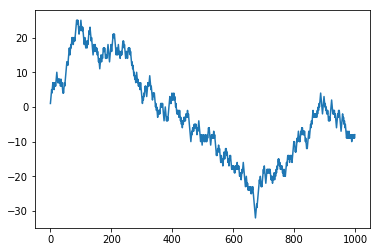

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(walk)

In [59]:
walk.min()

-32

In [60]:
walk.max()

25

In [61]:
# We might also want to calculate FIRST CROSSING TIME -- how many steps it took to reach a particular value
# We can use argmax() -- when it first reached this value
# For example, to work out when we first got 10 steps away:
(np.abs(walk) >= 10).argmax()

21

In [70]:
# Now, say we wanted to take 5000 walks...
num_of_walks = 5000
steps_per_walk = 1000

# This will give us 5000 rows, each with 1000 random numbers in it (i.e., 1000 columns)
random_values = np.random.randint(0, 2, size=(num_of_walks, steps_per_walk))

print(random_values.shape)

# Calculate the steps like normal
steps = np.where(random_values > 0, 1, -1)

# Calculate the cumulative sum across the columns (e.g., rows -- calculate the values for each walk)
walks = steps.cumsum(1)

print(walks)

(5000L, 1000L)
[[  1   2   3 ...,  38  37  38]
 [  1   0   1 ..., -16 -17 -16]
 [ -1   0  -1 ...,  42  41  42]
 ..., 
 [ -1  -2  -3 ...,  20  19  20]
 [  1   0   1 ..., -46 -45 -46]
 [  1   0   1 ...,  26  27  26]]


In [71]:
# Now we can compute the max and min over 5000 walks!
walks.min()

-128

In [72]:
walks.max()

126

In [74]:
# Find out how many walks reach 30
hit_30 = (np.abs(walks) >= 30).any(1)
hit_30

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [75]:
hit_30.sum()

3351

In [77]:
# Now get the crossing times using Boolean indexing with the array above and our argument from before
crossing_times = (np.abs(walks[hit_30]) >= 30).argmax(1)
crossing_times

array([195, 711, 425, ..., 703, 561, 305], dtype=int64)

In [78]:
# Then get the mean
crossing_times.mean()

502.8382572366458

## 3. pandas
Data structures and manipulation libraries.
NumPy = homogenous, numerical array data
pandas = tabular or heterogeneous data

In [79]:
# Import conventions
import pandas as pd
from pandas import Series, DataFrame

### 3.1 Series
A 1D array-like object.
Contains a list of values and associated array of labels.
This array of labels is called its __index__.

In [80]:
simple_series = pd.Series([5, 9, 2, 5])

simple_series

0    5
1    9
2    2
3    5
dtype: int64

In [81]:
simple_series.values

array([5, 9, 2, 5], dtype=int64)

In [82]:
simple_series.index

RangeIndex(start=0, stop=4, step=1)

In [84]:
# You can specify your own index too
series_with_index = pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"])

series_with_index

a    1
b    2
c    3
d    4
dtype: int64

In [85]:
# You can then access elements using this custo index
series_with_index["b"]

2

In [86]:
series_with_index["a"] = 9

series_with_index

a    9
b    2
c    3
d    4
dtype: int64

In [87]:
series_with_index[["a", "d"]]

a    9
d    4
dtype: int64

In [88]:
# Mathematical operations won't affect the index-value relationship
series_with_index[series_with_index>2]

a    9
c    3
d    4
dtype: int64

In [89]:
series_with_index*2

a    18
b     4
c     6
d     8
dtype: int64

In [90]:
series_with_index

a    9
b    2
c    3
d    4
dtype: int64

In [91]:
# Series is kind of like a fixed-length, ordered dictionary. You can check if it contains a value.
"d" in series_with_index

True

In [92]:
"z" in series_with_index

False

In [95]:
# Therefore, you can create a series from a Python dictionary
data_dict = {"Name": "Graham", "Age": "23", "Language": "Python"}

series_from_dict = pd.Series(data_dict)
# Note, when the series is generated, the keys are stored in sorted order
series_from_dict

Age             23
Language    Python
Name        Graham
dtype: object

In [97]:
# You could also pass in a dictionary and ANOTHER index as a list, which will cause
# the keys to be in that list order instead
data_index = ["Name", "Age", "Height"]

series_from_dict = pd.Series(data_dict, index=data_index)
series_from_dict

Name      Graham
Age           23
Height       NaN
dtype: object

In [98]:
# Notice height is missing, since it did not appear in the original dictionary.
# You can check missing values like this:
pd.isnull(series_from_dict)

Name      False
Age       False
Height     True
dtype: bool

In [99]:
# Or the inverse:
pd.notnull(series_from_dict)

Name       True
Age        True
Height    False
dtype: bool

A useful feature of `Series` is __data alignment__ using the index as keys. Like a database key in a join statement, it will use the index to automatically align 2 sets of data in mathematical operations.

In [103]:
# Keys not present in both Series are ignored, but those that exist in both are aligned
populations_1993 = {"Scotland": 5, "England": 65, "Wales": 2}
populations_2017 = {"Scotland": 6, "Ireland": 3, "England": 70}

series_1993 = pd.Series(populations_1993)
series_2017 = pd.Series(populations_2017)

series_2017 - series_1993

England     5.0
Ireland     NaN
Scotland    1.0
Wales       NaN
dtype: float64

In [104]:
# Both the series and the index for that series can be named
series_1993.name = "Populations"
series_1993.index.name = "Country"

series_1993

Country
England     65
Scotland     5
Wales        2
Name: Populations, dtype: int64

In [105]:
# The index can be altered in-place
series_1993.index = ["A", "B", "C"]

series_1993

A    65
B     5
C     2
Name: Populations, dtype: int64

### 3.2 DataFrame
Rectangular table of data.
Ordered collection of columns.
Each column can have a different data type.

In [106]:
data = {"Country": ["Japan", "UK", "Korea"],
        "Year": [2010, 2011, 2012],
        "Population": [100, 70, 45]}

frame = pd.DataFrame(data)

frame

,Country,Population,Year
0,Japan,100,2010
1,UK,70,2011
2,Korea,45,2012


In [107]:
# Use .head() to get the first five rows
frame.head()

,Country,Population,Year
0,Japan,100,2010
1,UK,70,2011
2,Korea,45,2012


In [112]:
# You can specify column order too
# Note, GDP is missing since it isn't in our dictionary
frame = pd.DataFrame(data, columns=["Year", "Population", "Country", "GDP"])

frame

,Year,Population,Country,GDP
0,2010,100,Japan,NaN
1,2011,70,UK,NaN
2,2012,45,Korea,NaN


In [113]:
# You can pull out a particular column too
frame["Country"]

0    Japan
1       UK
2    Korea
Name: Country, dtype: object

In [117]:
frame.Country

0    Japan
1       UK
2    Korea
Name: Country, dtype: object

In [121]:
# And loc retrieves a particular row
frame.loc[1]

Year          2011
Population      70
Country         UK
GDP            NaN
Name: 1, dtype: object

In [123]:
# You can set the entire value of a column
frame["GDP"] = 0
frame

,Year,Population,Country,GDP
0,2010,100,Japan,0
1,2011,70,UK,0
2,2012,45,Korea,0


In [126]:
# Or using arange
frame["GDP"] = np.arange(3.0)
frame

,Year,Population,Country,GDP
0,2010,100,Japan,0.0
1,2011,70,UK,1.0
2,2012,45,Korea,2.0


In [128]:
# We could add a column like this
frame["Growing"] = frame.GDP > 0.0
frame

,Year,Population,Country,GDP,Growing
0,2010,100,Japan,0.0,False
1,2011,70,UK,1.0,True
2,2012,45,Korea,2.0,True


In [129]:
# And then remove it like this
del frame["Growing"]
frame

,Year,Population,Country,GDP
0,2010,100,Japan,0.0
1,2011,70,UK,1.0
2,2012,45,Korea,2.0


In [132]:
# It's also common to create a dataframe from a nested dict of dicts
populations = { "Japan": {2010: 100, 2011: 95, 2012: 90},
                "UK": {2011: 75, 2012: 80},
                "Korean": {2010: 50, 2011: 60, 2012: 70}}

frame = pd.DataFrame(populations)

# Not missing keys will return NAN
frame

,Japan,Korean,UK
2010,100,50,NaN
2011,95,60,75.0
2012,90,70,80.0


In [133]:
# You can transpose rows/columns using NumPy-like syntax
frame.T

,2010,2011,2012
Japan,100.0,95.0,90.0
Korean,50.0,60.0,70.0
UK,NaN,75.0,80.0


In [134]:
# As with series, call values to get the values
frame.values

array([[ 100.,   50.,   nan],
       [  95.,   60.,   75.],
       [  90.,   70.,   80.]])

### 3.3 Index objects

In [138]:
# Index objects are immutable, though they can be sliced and queried, etc., of course.

frame = pd.Series(np.arange(3), index=["A", "B", "C"])
frame

A    0
B    1
C    2
dtype: int32

In [139]:
# Get the index object
index_obj = frame.index
index_obj

Index([u'A', u'B', u'C'], dtype='object')

In [142]:
# Take a slice
index_obj[:2]

Index([u'A', u'B'], dtype='object')

In [144]:
index_obj.columns

AttributeError: 'Index' object has no attribute 'columns'

In [146]:
# Note that a panda index can contain duplicates
some_labels = pd.Index(["A", "A", "B", "C"])
some_labels

Index([u'A', u'A', u'B', u'C'], dtype='object')

In [150]:
# If you select something with a dupe label, it will select all objects with that label
some_frame = pd.Series(np.arange(4), index=some_labels)
some_frame

A    0
A    1
B    2
C    3
dtype: int32

In [151]:
some_frame["A"]

A    0
A    1
dtype: int32

In [152]:
# Despite allowing duplicate labels, indexes allow for various set-like operations such as union, intersection, etc.

### 3.4 Basic pandas functionality

#### 3.4.1 Reindexing
Reindexing means applying a new index to some data.
For example, maybe the data was unorganized, or you want to apply a standard index to some messy data.

In [153]:
# First, imagine you have your messy data:
my_series = pd.Series([3.12, 31.2, 12.3, 42.2], index=["D", "A", "B", "C"])
my_series

D     3.12
A    31.20
B    12.30
C    42.20
dtype: float64

In [154]:
# Then we reindex it to sort it. Note if an element in our new index is not found we'll get NaN
my_series.reindex(["A", "B", "C", "D", "E"])

A    31.20
B    12.30
C    42.20
D     3.12
E      NaN
dtype: float64

In [155]:
# ffill -- forward fill -- will fill in some values when reindexing. Useful when using a time series, for example.
series = pd.Series(["Red", "Blue", "Green"], index = [0, 2, 4])
series

0      Red
2     Blue
4    Green
dtype: object

In [157]:
series.reindex(np.arange(6), method="ffill")

0      Red
1      Red
2     Blue
3     Blue
4    Green
5    Green
dtype: object

In [160]:
# DataFrame reindexing can alter the rows (index), columns, or both
frame = pd.DataFrame(np.arange(9).reshape((3,3)), index=["a", "c", "d"], columns=["Ohio", "Texas", "California"])

frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [165]:
# When passed a sequence, it reindexes the rows
frame.reindex(["a", "b", "c", "d"])

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [166]:
# Use the columns parameter to reindex the columns
frame.reindex(columns=["Texas", "Utah", "California"])

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


#### 3.4.2 Dropping entries
Delete rows using the `drop` function.

In [171]:
frame = pd.Series(np.arange(5), index=['a', 'b', 'c', 'd', 'e'])
frame

a    0
b    1
c    2
d    3
e    4
dtype: int32

In [172]:
frame.drop('c')

a    0
b    1
d    3
e    4
dtype: int32

In [176]:
# DataFrame can drop rows or columns
data = pd.DataFrame(np.arange(9).reshape((3, 3)), index=['Ohio', 'Utah', 'California'], columns=['one', 'two', 'three'])

data

,one,two,three
Ohio,0,1,2
Utah,3,4,5
California,6,7,8


In [180]:
data.drop(['Ohio', 'Utah'])

,one,two,three
California,6,7,8


In [181]:
# axis=1 and axis='columns' can both be used to drop columns
data.drop('two', axis=1)

,one,three
Ohio,0,2
Utah,3,5
California,6,8


In [182]:
# Note that this wasn't in-place.
data

,one,two,three
Ohio,0,1,2
Utah,3,4,5
California,6,7,8


In [183]:
# To do it in-place, pass that parameter
data.drop('two', axis=1, inplace=True)

In [184]:
data

,one,three
Ohio,0,2
Utah,3,5
California,6,8


#### 3.4.3 Indexing, Selection, Filtering

In [185]:
# We can use the index values to select elements
series = pd.Series(np.arange(4.0), index=['a', 'b', 'c', 'd'])
series

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [186]:
series['d']

3.0

In [192]:
#Note that slicing with labels is inclusive for the end point
series['b':'d']

b    1.0
c    2.0
d    3.0
dtype: float64

In [193]:
# Or specify the elements in some order
series[['d', 'b', 'c']]

d    3.0
b    1.0
c    2.0
dtype: float64

In [194]:
# You can also select like this by index too
series[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [195]:
# Or use Boolean indexing
series[series < 2]

a    0.0
b    1.0
dtype: float64

In [197]:
# With DataFrames, use indexing to retrieve columns
data = pd.DataFrame(np.arange(9).reshape((3, 3,)), index=["Ohio", "California", "Texas"], columns=["one", "two", "three"])

data

,one,two,three
Ohio,0,1,2
California,3,4,5
Texas,6,7,8


In [198]:
data["two"]

Ohio          1
California    4
Texas         7
Name: two, dtype: int32

In [199]:
data[["three", "one"]]

,three,one
Ohio,2,0
California,5,3
Texas,8,6


In [201]:
# Slice with an integer index and get the rows instead
data[:2]

,one,two,three
Ohio,0,1,2
California,3,4,5


In [203]:
data[1:]

,one,two,three
California,3,4,5
Texas,6,7,8


In [204]:
data

,one,two,three
Ohio,0,1,2
California,3,4,5
Texas,6,7,8


In [206]:
# Query columns by putting a Boolean query in the []
data[data["two"]>1] # Find all rows > 1 in the two column

,one,two,three
California,3,4,5
Texas,6,7,8


In [208]:
# A Boolean query on the whole DataFrame will show you which elements satisfy this condition
data < 5

,one,two,three
Ohio,True,True,True
California,True,True,False
Texas,False,False,False


In [209]:
# You can use this to, for example, reset certain values
data[data < 5] = 0
data

,one,two,three
Ohio,0,0,0
California,0,0,5
Texas,6,7,8


#### 3.4.4 loc and iloc
`loc` and `iloc` are special indexing operators for selecting subset of rows and columns from a `DataFrame`.

* `loc`: Select by axis label
* `iloc`: Select by integer

In [210]:
data

,one,two,three
Ohio,0,0,0
California,0,0,5
Texas,6,7,8


In [212]:
# Select row, [columns]
data.loc['California', ['two', 'three']]

two      0
three    5
Name: California, dtype: int32

In [214]:
# Or we can use indices instead
data.iloc[1, [1, 2]]

two      0
three    5
Name: California, dtype: int32

In [215]:
# If we want, we can select the whole row with iloc
data.iloc[2]

one      6
two      7
three    8
Name: Texas, dtype: int32

In [216]:
# Or we can select an arbitrary number of rows and columns
data.iloc[[1, 2], [0, 1]]

,one,two
California,0,0
Texas,6,7


In [217]:
# We can use slicing too
data

,one,two,three
Ohio,0,0,0
California,0,0,5
Texas,6,7,8


In [220]:
data.loc[:"California", "two"]

Ohio          0
California    0
Name: two, dtype: int32

#### 3.4.5 Arithmetic
Series will be automatically aligned using their index.

In [4]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([5, 6, 7, 8], index=['a', 'b', 'c', 'd'])

s1+s2

a     6.0
b     NaN
c     9.0
d    11.0
e     NaN
dtype: float64

In [8]:
# DataFrame will align on both the rows and the columns
df1 = pd.DataFrame(np.arange(9.0).reshape((3,3)), columns=list('bcd'), index=['Ohio', 'Texas', 'California'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
California,6.0,7.0,8.0


In [10]:
df2 = pd.DataFrame(np.arange(12.0).reshape((4,3)), columns=list('bde'), index=['Ohio', 'Texas', 'California', 'Oregan'])
df2

,b,d,e
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
California,6.0,7.0,8.0
Oregan,9.0,10.0,11.0


In [11]:
# We get NaN if they row/columns don't match
df1 + df2

,b,c,d,e
California,12.0,NaN,15.0,NaN
Ohio,0.0,NaN,3.0,NaN
Oregan,NaN,NaN,NaN,NaN
Texas,6.0,NaN,9.0,NaN


In [12]:
# We could pass in a fill value for these NaN elements
df1.add(df2, fill_value=0)

,b,c,d,e
California,12.0,7.0,15.0,8.0
Ohio,0.0,1.0,3.0,2.0
Oregan,9.0,NaN,10.0,11.0
Texas,6.0,4.0,9.0,5.0


In [13]:
# We can also do basic arithmetic
1/df1

,b,c,d
Ohio,inf,1.000000,0.500
Texas,0.333333,0.250000,0.200
California,0.166667,0.142857,0.125


In [16]:
# Operations between a Series and DataFrame:
# By default, match the Series index with Dataframe columns
df1 = pd.DataFrame(np.arange(9.0).reshape((3,3)), columns=list('bcd'), index=['Ohio', 'Texas', 'California'])

series = df1.iloc[1]

df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
California,6.0,7.0,8.0


In [17]:
series

b    3.0
c    4.0
d    5.0
Name: Texas, dtype: float64

In [19]:
# Subtract using the series index matching the columns, broadcasting down the rows
df1-series

,b,c,d
Ohio,-3.0,-3.0,-3.0
Texas,0.0,0.0,0.0
California,3.0,3.0,3.0


In [25]:
series = pd.Series(range(3), index=['b','d','f'])
series

b    0
d    1
f    2
dtype: int64

In [26]:
# If the Series index/DataFrame columns don't match, form a union, setting non-matching to NaN
df1+series

,b,c,d,f
Ohio,0.0,NaN,3.0,NaN
Texas,3.0,NaN,6.0,NaN
California,6.0,NaN,9.0,NaN


#### 3.4.6 Ufuncs
NumPy ufuncs work with pandas objects too.

In [29]:
df1 = pd.DataFrame(np.arange(9.0).reshape((3,3)), columns=list('bcd'), index=['Ohio', 'Texas', 'California'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
California,6.0,7.0,8.0


In [30]:
np.negative(df1)

,b,c,d
Ohio,-0.0,-1.0,-2.0
Texas,-3.0,-4.0,-5.0
California,-6.0,-7.0,-8.0


In [32]:
# Use apply() to apply a function to each column/row
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
California,6.0,7.0,8.0


In [34]:
func = lambda x: x + 10.0

df1.apply(func)

,b,c,d
Ohio,10.0,11.0,12.0
Texas,13.0,14.0,15.0
California,16.0,17.0,18.0


In [35]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
California,6.0,7.0,8.0


In [37]:
# Or apply it to columns
df1.apply(func, axis='columns')

,b,c,d
Ohio,10.0,11.0,12.0
Texas,13.0,14.0,15.0
California,16.0,17.0,18.0


#### 3.4.7 Sorting

In [42]:
# Use sort_index() or sort_values() for Series
series = pd.Series(range(4), index=['d', 'a', 'c', 'b'])
series

d    0
a    1
c    2
b    3
dtype: int64

In [43]:
series.sort_index()

a    1
b    3
c    2
d    0
dtype: int64

In [44]:
series.sort_values()

d    0
a    1
c    2
b    3
dtype: int64

In [47]:
# With a DataFrame, you can sort on rows or columns
df1 = pd.DataFrame(np.arange(9.0).reshape((3,3)), columns=list('cbd'), index=['Ohio', 'Texas', 'California'])
df1

,c,b,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
California,6.0,7.0,8.0


In [48]:
# For DataFrame, you can use sort_index(), and choose an axis to sort by (rows or columns)
df1.sort_index() # Sort by rows

,c,b,d
California,6.0,7.0,8.0
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0


In [49]:
df1.sort_index(axis='columns')

,b,c,d
Ohio,1.0,0.0,2.0
Texas,4.0,3.0,5.0
California,7.0,6.0,8.0


In [51]:
# For sort_values(), pass in a column name to sort by
df1.sort_values(by='b')

,c,b,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
California,6.0,7.0,8.0


In [52]:
# Or sort by multiple columns
df1.sort_values(by=['b', 'd'])

,c,b,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
California,6.0,7.0,8.0


In [64]:
# rank() ranks the elements ascending by default. 1 = lowest number, etc.
# Dupes are assigned the mean rank.
series = pd.Series([4, 2, 3])
series

0    4
1    2
2    3
dtype: int64

In [65]:
series.rank()

0    3.0
1    1.0
2    2.0
dtype: float64

In [62]:
# Alternatively, dupe entries can be assigned rank() based on which elements appear first
series = pd.Series([4, 2, 3, 2])
series
series.rank(method="first")

0    4.0
1    1.0
2    3.0
3    2.0
dtype: float64

In [66]:
# We can also do descending rank
series = pd.Series([3, 5, 1])
series.rank(ascending=False)

0    2.0
1    1.0
2    3.0
dtype: float64

In [67]:
# DataFrames can rank over rows or columns

#### 3.4.8 Duplicate Axis Labels

In [3]:
# Say you have a series with duplicate labels
series = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
series

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [5]:
# Check if the index is unique
series.index.is_unique

False

In [6]:
# Instead of returning the scalar value, calling a duplicate index will return another Series with
# all of those values
series['a']

a    0
a    1
dtype: int64

In [10]:
# Same with DataFrame
df = pd.DataFrame(np.random.rand(4, 3), index=['a', 'a', 'b', 'c'])
df

,0,1,2
a,0.729719,0.153271,0.965323
a,0.806528,0.910886,0.857914
b,0.120970,0.355451,0.625079
c,0.682595,0.628094,0.322738


In [13]:
df.loc['a']

,0,1,2
a,0.729719,0.153271,0.965323
a,0.806528,0.910886,0.857914


### 3.5 Computing Stats
Most statistical functions in `pandas` are for reducing or summarizing statistics (calculating the mean, etc.).
Unlike `NumPy`, they have built-in handling for missing data.

In [14]:
df = pd.DataFrame([[1, np.nan], [3, 7], [np.nan, np.nan], [3, 1]], index=['a', 'b', 'c', 'd'], columns=['one', 'two'])
df

,one,two
a,1.0,NaN
b,3.0,7.0
c,NaN,NaN
d,3.0,1.0


In [15]:
# sum() sums up the columns
df.sum()

one    7.0
two    8.0
dtype: float64

In [16]:
# Or we can sum across the columns (rows) instead
df.sum(axis='columns')

a     1.0
b    10.0
c     0.0
d     4.0
dtype: float64

In [19]:
# Returns the first occurance of maximum over requested axis
# I.e., returns the max value in each column, first time it appears
df.idxmax()

one    b
two    b
dtype: object

In [20]:
df.cumsum()

,one,two
a,1.0,NaN
b,4.0,7.0
c,NaN,NaN
d,7.0,8.0


In [22]:
# For numerical data, describe() gives you a stats summary
df.describe()

,one,two
count,3.000000,2.000000
mean,2.333333,4.000000
std,1.154701,4.242641
min,1.000000,1.000000
25%,2.000000,2.500000
50%,3.000000,4.000000
75%,3.000000,5.500000
max,3.000000,7.000000


In [23]:
# For non-numerical data, the stats are different
series = pd.Series(['a', 'b', 'c', 'd'] * 4)
series

0     a
1     b
2     c
3     d
4     a
5     b
6     c
7     d
8     a
9     b
10    c
11    d
12    a
13    b
14    c
15    d
dtype: object

In [24]:
series.describe()

count     16
unique     4
top        d
freq       4
dtype: object

### 3.6 Correlation and Covariance
Reminder:

Correlation: The degree to which one variable can be used to predict another (r), like if you can draw a line through your data points.

Covariance: How things change togeher. +ve covariance = move together, -ve covariance = move inversely

In [12]:
# We can use datareader to download data sets
import pandas_datareader.data as web

all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}


price = pd.DataFrame({ticker: data['Adj Close']
                      for ticker, data in all_data.items()})

volume = pd.DataFrame({ticker: data['Volume']
                        for ticker, data in all_data.items()})

In [15]:
# Compute price change
returns = price.pct_change()
returns.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2017-11-20,-0.000999,-0.000697,0.010338,0.001578
2017-11-21,0.018590,0.015819,0.009567,0.014419
2017-11-22,0.010512,0.001421,-0.001185,-0.007286
2017-11-24,0.000057,0.004489,0.000461,0.001805
2017-11-27,-0.005029,0.013069,0.000922,0.007326


In [17]:
# Compute correlation between overlapping values matched by index of two series
returns['MSFT'].corr(returns['GOOG'])

0.47992071867710434

In [18]:
# Likewise, computer covariance
returns['MSFT'].cov(returns['GOOG'])

0.00010232032304795472

In [20]:
# Or you could check the correlation of everything against a particular stock
# (Note, the returns. syntax can be used instead of a String literal)
returns.corrwith(returns.IBM)

AAPL    0.357755
GOOG    0.382849
IBM     1.000000
MSFT    0.470974
dtype: float64

### 3.7 Unique values, member counts, etc.

In [22]:
series = pd.Series(['c', 'a', 'c', 'b', 'd', 'a', 'c', 'a'])
series

0    c
1    a
2    c
3    b
4    d
5    a
6    c
7    a
dtype: object

In [23]:
series.unique()

array(['c', 'a', 'b', 'd'], dtype=object)

In [25]:
# Descending order by default
series.value_counts()

c    3
a    3
d    1
b    1
dtype: int64

## 4. Loading/Saving Data & File Formats
Data loading functions have grown to be rather large and complex, due to the reality of how messy real-world data can be.

In [36]:
!type "examples\ex1.csv"

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [3]:
# Comma-delimited data can be easily read into a DataFrame
df = pd.read_csv("examples\ex1.csv")
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [4]:
# Or we can use read_table, specifying the delimiter
df = pd.read_table("examples\ex1.csv", delimiter=",")
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [5]:
# If a file has no header, you can let pandas assign default names, or assign them yourself
!type "examples\ex2.csv"

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [6]:
# Default header
df = pd.read_csv("examples\ex2.csv", header=None)
df

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [7]:
# Specify custom header
df = pd.read_csv("examples\ex2.csv", names=["a", "b", "c", "d", "message"])
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [9]:
# You can also specify the index column
df = pd.read_csv("examples\ex2.csv", names=["a", "b", "c", "d", "message"], index_col="message")
df

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [11]:
# Some files might not have a fixed delimited. For example, they might use a random amount of white space.
# In the file below, there is a variable amount of whitespace between field
list(open("examples\ex3.txt"))

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491\n']

In [12]:
# So we can pass in a regular expression to parse the fields instead.
# Note, because there is one fewer header than data columns, pandas detects that the first column
#       should be an index.
result = pd.read_table("examples\ex3.txt", sep="\s+")
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [13]:
# You can also skip rows if you want
!type "examples\ex4.csv"

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [15]:
pd.read_csv("examples\ex4.csv", skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [16]:
# Missing data is usually marked by a sentinel value like NA or NULL
!type "examples\ex5.csv"

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo


In [18]:
result = pd.read_csv("examples\ex5.csv")
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [20]:
# You can specify for each column the marker for missing values
missing_value_markers = {"message": ["NA", "foo"], "something": ["two"]}
pd.read_csv("examples\ex5.csv", na_values=missing_value_markers)

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


### 4.1 Reading parts of files
To make the notes easier to read, we can change `pandas` display settings.

In [21]:
pd.options.display.max_rows = 10

In [22]:
result = pd.read_csv("examples\ex6.csv")
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [2]:
# You can just read n rows
pd.read_csv("examples\ex6.csv", nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [4]:
# Alternatively, pass the number of rows in as a chunksize argument
# then iterate over the chunks
chunker = pd.read_csv("examples\ex6.csv", chunksize=1000)

In [6]:
total = pd.Series([])

for chunk in chunker:
    total = total.add(chunk["key"].value_counts(), fill_value=0)
    
total = total.sort_values(ascending=False)

total[:10]

E    336.0
X    327.0
L    315.0
M    309.0
K    303.0
Q    301.0
O    299.0
P    299.0
J    298.0
F    295.0
dtype: float64

## 4.2 Wrangling delimited formats
Sometimes the file may require some manual wrangling.

The idea is that we deal with the file a line at a time, dealing with the data as needed.

In [10]:
!type "examples\ex7.csv"

"a","b","c"
"1","2","3"
"1","2","3"


In [13]:
import csv

# First get the lines of the file
with open("examples\ex7.csv") as file:
    lines = list(csv.reader(file))

lines

[['a', 'b', 'c'], ['1', '2', '3'], ['1', '2', '3']]

In [14]:
# Now we need to split out the header and the rest of the file
header, values = lines[0], lines[1:]

print(header)
print(values)

['a', 'b', 'c']
[['1', '2', '3'], ['1', '2', '3']]


In [16]:
# Then we create a dictionary comprehension.
# Recall that zip(*...) transposes rows to columns
data_dict = {h: v for h, v in zip(header, zip(*values))}

data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

In [19]:
# A dialect holds a list of parameters used by reader and writer objects to help with file reading/writing
# E.g., you have Dialect.delimiter, Dialect.lineterminator, etc.
# You can create your own custom dialect to read your own CSV file format.
csv.list_dialects()

['excel', 'excel-tab', 'unix']

In [25]:
# So, let's subclass Dialect
class my_dialect(csv.Dialect):
    lineterminator = '\n'
    delimiter = ';'
    quotechar = '"'
    quoting = csv.QUOTE_MINIMAL
    
with open("examples\ex7.csv") as file:
    reader = csv.reader(file, dialect=my_dialect)
    lines = list(csv.reader(file))

lines

[['a', 'b', 'c'], ['1', '2', '3'], ['1', '2', '3']]

In [26]:
# We can also just pass in a single dialect attribute as a paramter
with open("examples\ex7.csv") as file:
    reader = csv.reader(file, delimiter=";")
    lines = list(csv.reader(file))

lines

[['a', 'b', 'c'], ['1', '2', '3'], ['1', '2', '3']]

In [29]:
# We can write data using our custom dialect as well
with open("examples\mydata.csv", "w") as file:
    writer = csv.writer(file, my_dialect)
    writer.writerow(('one', 'two', 'three'))
    writer.writerow(('1', '2', '3'))
    writer.writerow(('4', '5', '6'))

In [30]:
!type "examples\mydata.csv"

one;two;three
1;2;3
4;5;6


## 4.3 JSON
We can use libraries to read JSON data.

In [31]:
json_obj = """
{"name": "Tim",
 "places_lived": ["Japan", "UK"],
 "pet": null
 }
 """

In [32]:
import json

result = json.loads(json_obj)

result

{'name': 'Tim', 'pet': None, 'places_lived': ['Japan', 'UK']}

In [33]:
# Use json.dumps to convert a Python object to JSON
py_json = json.dumps(result)

py_json

'{"name": "Tim", "places_lived": ["Japan", "UK"], "pet": null}'

In [35]:
# You can construct a dataframe from your deserialized object
df = pd.DataFrame(result)

df

,name,pet,places_lived
0,Tim,None,Japan
1,Tim,None,UK


In [36]:
# pandas.read_json can convert JSON to a Series or DataFrame
!type "examples\example.json"

[{"a": 1, "b": 2, "c": 3},
 {"a": 4, "b": 5, "c": 6},
 {"a": 7, "b": 8, "c": 9}]


In [37]:
# By default, it assumes each JSON object is a row in the table
data = pd.read_json("examples\example.json")
data


,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [39]:
# And you can convert back to JSON using to_json()
print(data.to_json())

print(data.to_json(orient='records'))

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}
[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]


## 4.4 XML/HTML -- web scraping
There are various libraries to do this already.
pandas has one too.

By default read_html will attempt to parse all tabular data

In [3]:
# HTML can be parsed as XML too
from lxml import objectify
from io import StringIO

tag = '<a href="https://www.google.com">Google</a>'
root = objectify.parse(StringIO(tag)).getroot()

root

<Element a at 0x21a0e672a88>

In [5]:
root.get('href')

'https://www.google.com'

In [6]:
root.text

'Google'

## 4.5 Binary data formats
Python's `pickle` module serializes and deserializes Python objects.
pandas objects can all use `to_pickle()` to write data to disc in pickle format.

Note: Pickle format is not recommended for long term storage. You may not be able to deserialize objects later due to version changes.

In [7]:
df = pd.read_csv("examples\ex1.csv")
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [9]:
df.to_pickle("examples\my_pickle")

In [11]:
pd.read_pickle("examples\my_pickle")

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


## 4.6 Excel files

In [16]:
xlsx_file = pd.ExcelFile("examples\ex1.xlsx")

pd.read_excel(xlsx_file, 'Sheet1')

# Likewise we can write back to Excel using pd.ExcelWriter(...)

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


## 4.7 Web APIs
Recommended to use the `requests` package.

In [21]:
import requests

url = 'https://api.github.com/repos/pandas-dev/pandas/issues'

resp = requests.get(url)
resp

<Response [200]>

In [28]:
data = resp.json()
data[0]['title']

'Segmentation Fault on MacOS when running test_pickle.py'

In [30]:
# We can pass the data JSON into a DataFrame and look the fields we want as columns
issues = pd.DataFrame(data, columns=['number', 'title'])
issues

,number,title
0,18563,Segmentation Fault on MacOS when running test_...
1,18562,"""AssertionError: Gaps in blk ref_locs"" when un..."
2,18561,drop(level=.) doesn't raise if label is absent
3,18559,DOC: .nlargest/smallest docs specify keep=Fals...
4,18558,ENH: Support TZ Aware IntervalIndex
5,18557,"Update imports, use nogil version of sqrt"
6,18556,Cleanup cimports
7,18555,CLN: Move period.pyx to tslibs/period.pyx
8,18554,array_to_datetime set seen_datetime consistently
9,18553,"pd.tseries.frequencies.is_subperiod(x, x) is i..."


## 4.8 Databases
We can read/write from various database types too.

# 5. Data cleaning and prep

In [32]:
# Use dropna to get rid of missing data
from numpy import nan as NA

data = pd.Series([1.5, NA, 4, NA])
data

0    1.5
1    NaN
2    4.0
3    NaN
dtype: float64

In [33]:
data.dropna()

0    1.5
2    4.0
dtype: float64

In [35]:
# This is the same as the following Boolean indexing
data[data.notnull()]

0    1.5
2    4.0
dtype: float64

In [36]:
data.notnull()

0     True
1    False
2     True
3    False
dtype: bool

In [3]:
# DataFrames are a bit more complex. Do you drop rows or columns? Do you drop them if they contain any NAs?
# Or only if they are all NAs?
from numpy import nan as NA

df = pd.DataFrame([[1, 6, 2], [1, NA, NA], [NA, NA, NA], [NA, 6, 3]])
df

,0,1,2
0,1.0,6.0,2.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.0,3.0


In [4]:
# By default, dropna() will drop any rows with missing data
df.dropna()

,0,1,2
0,1.0,6.0,2.0


In [5]:
# 'all' will drop only rows that are all missing
df.dropna(how='all')

,0,1,2
0,1.0,6.0,2.0
1,1.0,NaN,NaN
3,NaN,6.0,3.0


In [6]:
# Just specify the axis=1 to do the same with columns
df.dropna(axis=1)

""
0
1
2
3


In [7]:
df.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.0,2.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.0,3.0


In [9]:
# For time series arguments, you might want to only keep rows with a certain number of observatons
# I.e., drop all rows that have >= n missing values.
# For this, we use the .thresh() argument.
import numpy as np
df = pd.DataFrame(np.random.randn(7, 3))

df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA

df

,0,1,2
0,-0.045365,NaN,NaN
1,1.299472,NaN,NaN
2,-0.697341,NaN,0.337186
3,1.637462,NaN,0.902596
4,-0.132694,-1.412381,-1.149316
5,0.226800,2.176065,0.364944
6,-2.038461,0.734774,0.148989


In [11]:
# Only drop rows 0,1 -- since they have >=2 missing arguments
df.dropna(thresh=2)

,0,1,2
2,-0.697341,NaN,0.337186
3,1.637462,NaN,0.902596
4,-0.132694,-1.412381,-1.149316
5,0.226800,2.176065,0.364944
6,-2.038461,0.734774,0.148989


## 5.1 Filling in Missing Data

In [13]:
# fillna fills in missing values
df

,0,1,2
0,-0.045365,NaN,NaN
1,1.299472,NaN,NaN
2,-0.697341,NaN,0.337186
3,1.637462,NaN,0.902596
4,-0.132694,-1.412381,-1.149316
5,0.226800,2.176065,0.364944
6,-2.038461,0.734774,0.148989


In [14]:
df.fillna(0.0)

,0,1,2
0,-0.045365,0.000000,0.000000
1,1.299472,0.000000,0.000000
2,-0.697341,0.000000,0.337186
3,1.637462,0.000000,0.902596
4,-0.132694,-1.412381,-1.149316
5,0.226800,2.176065,0.364944
6,-2.038461,0.734774,0.148989


In [17]:
# You can also specify a dictionary of columns, you can also fill in-place if you want
df.fillna({1: 0.5, 2: 0.0}, inplace=True)

,0,1,2
0,-0.045365,0.500000,0.000000
1,1.299472,0.500000,0.000000
2,-0.697341,0.500000,0.337186
3,1.637462,0.500000,0.902596
4,-0.132694,-1.412381,-1.149316
5,0.226800,2.176065,0.364944
6,-2.038461,0.734774,0.148989


In [19]:
# You can do interpolate the data down with ffill
df = pd.DataFrame(np.random.randn(7, 3))

df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA

df

,0,1,2
0,-0.296416,2.857197,0.161844
1,-1.801381,0.173463,1.178286
2,-0.896942,NaN,-0.602805
3,0.783311,NaN,0.346216
4,0.106044,NaN,NaN
5,0.054970,NaN,NaN
6,0.423706,NaN,NaN


In [20]:
df.fillna(method='ffill')

,0,1,2
0,-0.296416,2.857197,0.161844
1,-1.801381,0.173463,1.178286
2,-0.896942,0.173463,-0.602805
3,0.783311,0.173463,0.346216
4,0.106044,0.173463,0.346216
5,0.054970,0.173463,0.346216
6,0.423706,0.173463,0.346216


In [21]:
# If you think about it, you could also fill in the mean or whatever
data = pd.Series([1.0, NA, 7.0, NA])
data

0    1.0
1    NaN
2    7.0
3    NaN
dtype: float64

In [22]:
data.fillna(data.mean())

0    1.0
1    4.0
2    7.0
3    4.0
dtype: float64

## 5.2 Transforming Data

### 5.2.1 Removing Dupes

In [5]:
# Consider the following set with some duplicate keys:
df = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                   'k2': [1, 1, 2, 3, 3, 4, 4]})

df

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [6]:
# duplicated() returns a Boolean series indicating whether each row is a dupe (has been observed in previous row)
# (Considers all columns)
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [7]:
# Drop duplicates
df.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [9]:
df['v1'] = range(7)
df

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [10]:
# We can also specify the column when dropping duplicates
df.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


### 5.2.2 Transforming data with functions/mapping

In [13]:
df = pd.DataFrame({'Food': ['bacon', 'beef', 'chicken', 'bacon', 'honey ham', 'beef'],
                   'Stock': [4, 3, 2.1, 51, 2.5, 53.5]})

df

,Food,Stock
0,bacon,4.0
1,beef,3.0
2,chicken,2.1
3,bacon,51.0
4,honey ham,2.5
5,beef,53.5


In [14]:
# Imagine we wanted to add a column mapping each meat to an animal.
# First we define the mapping:
meat_to_animal = {
    'bacon': 'pig',
    'beef': 'cow',
    'chicken': 'chicken',
    'honey ham': 'pig'
}

meat_to_animal

{'bacon': 'pig', 'beef': 'cow', 'chicken': 'chicken', 'honey ham': 'pig'}

In [17]:
# Then map the two to a new column:
df['Animal'] = df['Food'].map(meat_to_animal)
df

,Food,Stock,Animal
0,bacon,4.0,pig
1,beef,3.0,cow
2,chicken,2.1,chicken
3,bacon,51.0,pig
4,honey ham,2.5,pig
5,beef,53.5,cow


### 5.2.3 Replacing Values
We can use `replace()` to do arbitrary replacement

In [18]:
data = pd.Series([1.0, -999, 2.0, 999.0, 3.0, -999])
data

0      1.0
1   -999.0
2      2.0
3    999.0
4      3.0
5   -999.0
dtype: float64

In [19]:
data.replace([-999, 999.0], [-1.0, 1.0])

0    1.0
1   -1.0
2    2.0
3    1.0
4    3.0
5   -1.0
dtype: float64

### 5.2.4 Discretization & Binning

In [24]:
# You can bin like this:
ages = [19, 25, 26, 28, 34, 35, 36, 40, 50, 55, 61, 62, 74]
bins = [18, 25, 35, 60, 100]

categories = pd.cut(ages, bins)

categories

[(18, 25], (18, 25], (25, 35], (25, 35], (25, 35], ..., (35, 60], (35, 60], (60, 100], (60, 100], (60, 100]]
Length: 13
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [26]:
# This is a new kind of object -- a pandas Categorical object.
# It can be queries in various ways

# Which caegory the data is in
categories.codes 

array([0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3], dtype=int8)

In [27]:
# The categories
categories.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]]
              closed='right',
              dtype='interval[int64]')

In [28]:
pd.value_counts(categories)

(35, 60]     4
(25, 35]     4
(60, 100]    3
(18, 25]     2
dtype: int64

In [29]:
# You can also give names to the categories
category_names = ['Youth', 'Young Adult', 'Middle Aged', 'Wise Elder']
pd.cut(ages, bins, labels=category_names)

[Youth, Youth, Young Adult, Young Adult, Young Adult, ..., Middle Aged, Middle Aged, Wise Elder, Wise Elder, Wise Elder]
Length: 13
Categories (4, object): [Youth < Young Adult < Middle Aged < Wise Elder]

In [39]:
# Pass cut an integer and it will break the data into equal sized groups based on the min-max values of the series
sample_data = [1, 2, 3, 4, 5, 6]
cut_cats = pd.cut(sample_data, 3, precision=2)

In [40]:
pd.value_counts(cut_cats)
# 1, 2, 3 = 6
# 6, 7 = 13
# 4 = 4

(4.33, 6.0]     2
(2.67, 4.33]    2
(1.0, 2.67]     2
dtype: int64

In [42]:
# qcut will cut the data into quantiles
sample_data = range(100)
sample_data

range(0, 100)

In [43]:
quartiles = pd.qcut(sample_data, 4)

In [44]:
quartiles.categories

IntervalIndex([(-0.001, 24.75], (24.75, 49.5], (49.5, 74.25], (74.25, 99.0]]
              closed='right',
              dtype='interval[float64]')

In [45]:
pd.value_counts(quartiles)

(74.25, 99.0]      25
(49.5, 74.25]      25
(24.75, 49.5]      25
(-0.001, 24.75]    25
dtype: int64

In [46]:
# Alternatively pass in your own quantiles (between 0-1.0)
quantiles = pd.qcut(sample_data, [0, 0.1, 0.5, 0.9, 1.0])
quantiles.categories

IntervalIndex([(-0.001, 9.9], (9.9, 49.5], (49.5, 89.1], (89.1, 99.0]]
              closed='right',
              dtype='interval[float64]')

In [47]:
pd.value_counts(quantiles)

(49.5, 89.1]     40
(9.9, 49.5]      40
(89.1, 99.0]     10
(-0.001, 9.9]    10
dtype: int64

### 5.2.5 Detecting/filtering outliers

In [50]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.043620,-0.002769,0.012815,0.066272
std,1.022027,0.982947,0.982647,0.982667
min,-2.841001,-3.066642,-3.378543,-2.644130
25%,-0.737690,-0.636831,-0.673310,-0.608898
50%,-0.029237,-0.024489,0.022914,0.002193
75%,0.646093,0.673143,0.728607,0.724789
max,3.170879,3.112427,3.287537,3.401596


In [51]:
# If you wanted to find, say, all the numbers in column 2 > absolute value of 3, just use a boolean index:
col = data[2]
col[np.abs(col) > 3]

206   -3.378543
556   -3.145094
870    3.287537
875   -3.156724
Name: 2, dtype: float64

In [52]:
# To select any row with the same condition, use any
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
77,-2.841001,-0.055179,-1.418537,3.401596
173,1.444298,-3.051246,-0.260005,-0.512388
206,-1.102517,-0.806463,-3.378543,-0.600976
252,-0.830254,3.112427,0.022512,-0.487812
414,3.170879,-0.101035,-1.075927,-1.189764
556,-1.166469,-0.337541,-3.145094,-1.502056
622,-0.848474,-0.403192,0.817784,3.181241
626,2.167252,-3.066642,-0.039903,1.024185
672,3.151890,0.206578,-0.101706,0.901806
726,-1.452800,0.153283,-0.729963,3.016972


In [55]:
# You could also use this to cap data:
# (sign returns 1 or -1 depending on whether the value is positive or negative)
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.044076,-0.002763,0.013208,0.065672
std,1.020634,0.982233,0.979540,0.980774
min,-2.841001,-3.000000,-3.000000,-2.644130
25%,-0.737690,-0.636831,-0.673310,-0.608898
50%,-0.029237,-0.024489,0.022914,0.002193
75%,0.646093,0.673143,0.728607,0.724789
max,3.000000,3.000000,3.000000,3.000000


### 5.2.6 Permutation & random sampling

In [56]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [58]:
# Get a permutation of the range 0-4
sampler = np.random.permutation(5)
sampler

array([3, 0, 1, 4, 2])

In [59]:
# You can then take the rows in random order using this array
df.take(sampler)

,0,1,2,3
3,12,13,14,15
0,0,1,2,3
1,4,5,6,7
4,16,17,18,19
2,8,9,10,11


In [60]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [63]:
# Alternatively, use sample to grab some random rows
df.sample(n=2)

,0,1,2,3
0,0,1,2,3
2,8,9,10,11


In [65]:
# Alternatively, to get repeat choices, use the replace argument
dice = pd.Series([1, 2, 3, 4, 5, 6])
dice

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [67]:
rolls = dice.sample(n=10, replace=True)
rolls

5    6
0    1
5    6
2    3
2    3
1    2
5    6
2    3
3    4
4    5
dtype: int64

## 5.3 String manipulation

In [69]:
# Often basic Python string manipulation will suffice
text = 'Some, series, of,       words'

words = [x.strip() for x in text.split(',')]
words

['Some', 'series', 'of', 'words']

In [71]:
# You could then join these back together if you wanted
'::'.join(words)

'Some::series::of::words'

In [72]:
# We can also just use Python methods to check strings
'series' in text

True

In [73]:
text.find('missing')

-1

In [74]:
text.count(',')

3

In [76]:
# Of course, you can use regex (see other Python notes for more)
# And compile the regex for use in different places
import re

text = "Here    is      \tsome              \ttext"
space_splitter = re.compile('\s+')

space_splitter.split(text)

['Here', 'is', 'some', 'text']

In [77]:
# Or use it to find all the patterns matched
space_splitter.findall(text)

['    ', '      \t', '              \t']

In [78]:
# Consider a list of email addresses:
addresses = """Man man@gmail.com
Guy guy@yahoo.com
Person person@bing.com
Ello ello@facebook.com
"""

mail_pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
mail_matcher = re.compile(mail_pattern, flags=re.IGNORECASE)

In [79]:
mail_matcher.findall(addresses)

['man@gmail.com', 'guy@yahoo.com', 'person@bing.com', 'ello@facebook.com']

In [80]:
m = mail_matcher.search(addresses)

In [83]:
# Get first index of first address
m.start()

4

In [85]:
# Note, match will return NONE since the pattern doesn't occur at the start of the text
print(mail_matcher.match(addresses))

None


In [86]:
# Sub can replace matches
print(mail_matcher.sub('HIDDEN', addresses))

Man HIDDEN
Guy HIDDEN
Person HIDDEN
Ello HIDDEN



In [87]:
# If we want to segment our string to, say, bring back name, domain name, we put () around the parts
# we want to segment
mail_pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
mail_matcher = re.compile(mail_pattern, flags=re.IGNORECASE)

In [88]:
# Then use the groups method
mail = mail_matcher.match('person@domain.net')
mail.groups()

('person', 'domain', 'net')

In [89]:
# When the pattern has groups, use find all to split them up like this:
mail_matcher.findall(addresses)

[('man', 'gmail', 'com'),
 ('guy', 'yahoo', 'com'),
 ('person', 'bing', 'com'),
 ('ello', 'facebook', 'com')]

### 5.3.1 Vectoring string functions
Reminder: vectorizing is using some array operations to transform the data, instead of a for loop.

In [94]:
data = {'person': 'person@gmail.com', 'guy': 'guy@gmail.com', 'test': 'tester@msft.com', 'Graham': np.nan}
data = pd.Series(data)
data

Graham                 NaN
guy          guy@gmail.com
person    person@gmail.com
test       tester@msft.com
dtype: object

In [95]:
data.isnull()

Graham     True
guy       False
person    False
test      False
dtype: bool

In [96]:
# lambda and re methods will fail for null values. Series has array-oriented methods that will skip NA values.
# These work by checking the string value.
data.str.contains("gmail")

Graham      NaN
guy        True
person     True
test      False
dtype: object

In [98]:
# We can use regex with pandas objects too
mail_pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [101]:
matches = data.str.findall(mail_pattern, flags=re.IGNORECASE)
matches

Graham                       NaN
guy          [(guy, gmail, com)]
person    [(person, gmail, com)]
test       [(tester, msft, com)]
dtype: object

## 6. Data wrangling: join, combine, reshape

### 6.1 Hierarchical indexing
Hierarchical indexing allows you to have more than one level in your index.

In [106]:
# Here is an example of a series with a hierarchical index.
# The index is made up of two lists.
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'], [1, 2, 3, 1, 3, 1, 2, 2, 3]])

data

a  1    0.031101
   2    0.684241
   3   -0.343821
b  1    0.806234
   3   -1.769457
c  1    0.035896
   2   -1.067570
d  2    0.294296
   3    0.961086
dtype: float64

In [108]:
# Note the index is instantiated as a "MultiIndex".
# It has levels and labels.
data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 2, 0, 1, 1, 2]])

In [110]:
# We can use what's called PARTIAL INDEXING to select a subset of the data
data['b']

1    0.806234
3   -1.769457
dtype: float64

In [111]:
# Or slicing...
data['b':'c']

b  1    0.806234
   3   -1.769457
c  1    0.035896
   2   -1.067570
dtype: float64

In [113]:
# We could also choose to get, say, the 2-label data (a2, c2, d2 -- there is no b2)
data[:, 2]

a    0.684241
c   -1.067570
d    0.294296
dtype: float64

In [114]:
# What's the point? Well, for one, we can reshape this data into a table:
data.unstack()

,1,2,3
a,0.031101,0.684241,-0.343821
b,0.806234,NaN,-1.769457
c,0.035896,-1.067570,NaN
d,NaN,0.294296,0.961086


In [115]:
# Or you could reshape a table into a series
data.unstack().stack()

a  1    0.031101
   2    0.684241
   3   -0.343821
b  1    0.806234
   3   -1.769457
c  1    0.035896
   2   -1.067570
d  2    0.294296
   3    0.961086
dtype: float64

In [118]:
# In DataFrames, either axis can have a hierarchical index
df = pd.DataFrame(np.arange(12).reshape((4, 3)),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=[['Ohio', 'Ohio', 'Colorado'],
                           ['Green', 'Red', 'Green']])

df

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [120]:
# We can then set indentifiers for the different indexes
df.index.names = ['key1', 'key2']
df.columns.names = ['state', 'color']
df

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [121]:
# Then select data
df['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [124]:
# We can sort on a given index
df.sort_index(level=1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [125]:
# We can also choose the levels for our summary statistics
df.sum(level='key2')

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [126]:
df.sum(level='color', axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

In [127]:
# You might want to use a column as a row index, or the row index as a column
# Consider the following:
df = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                   'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
                   'd': [0, 1, 2, 0, 1, 2, 3]})

df

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [128]:
# Set index can take the columns and use them to create index
df2 = df.set_index(['c', 'd'])
df2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [129]:
# Reset index does the inverse -- take the index and make it into a column
df2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


### 6.2 Combining/merging datasets

* `pandas.merge` -- connect rows based on keys (SQL-like)
* `pandas.concat` -- concatenates or stacks along an axis
* `combine_first` -- splice together overlapping data in fill in missing values in one object with values from another

#### 6.2.1 Merge: SQL-like joins

In [130]:
# Imagine we had two DataFrames with "keys" in some column
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data': range(7)})

df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})

In [131]:
df1

,data,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [132]:
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [133]:
# Take the two DataFrames, and merge them based on key
# df1 has many rows for each key, but df2 just has one
# So it's a many-to-one merge
# Since df2 has no c key, it's discarded (by default we do an inner join -- an intersection)
# It would also be possible to do left, right, or outer joins
pd.merge(df1, df2, on='key')

,data,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [134]:
# If the column names don't match, you can specify them individually
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})

df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})

In [135]:
df3

,data1,lkey
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [136]:
df4

,data2,rkey
0,0,a
1,1,b
2,2,d


In [137]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


In [138]:
# If we don't want to discard the keys that don't intersect, do an outer join
pd.merge(df1, df2, how='outer')

,data,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


In [139]:
# Many-to-many join:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})

df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                   'data2': range(5)})

In [140]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [141]:
df2

,data2,key
0,0,a
1,1,b
2,2,a
3,3,b
4,4,d


In [143]:
# Note, the result of a many-to-many merge will be the Cartersian product of the rows
# E.g., 3b's * 2b'2 = 6 b rows in the merged output.
# {b1,b1}, {b1,b2}, {b2,b1}, {b2,b2}, {b3,b1}, {b3,b2}
pd.merge(df1, df2, on='key', how='left')

,data1,key,data2
0,0,b,1.0
1,0,b,3.0
2,1,b,1.0
3,1,b,3.0
4,2,a,0.0
5,2,a,2.0
6,3,c,NaN
7,4,a,0.0
8,4,a,2.0
9,5,b,1.0


In [144]:
# We can also merge on the index if we want
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})

right1 = pd.DataFrame({'group_value': [3.5, 7]}, index=['a', 'b'])

In [145]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [146]:
right1

,group_value
a,3.5
b,7.0


In [148]:
# right_index tells us to use the index for the right-hand DataFrame key
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_value
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [150]:
# For hierarchically indexed data, we need to join a multiple-key merge
left_df = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
            'key2': [2000, 2001, 2002, 2001, 2002],
            'data': np.arange(5)})

right_df = pd.DataFrame(np.arange(12).reshape((6,2)),
                        index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
                               [2001, 2000, 2000, 2000, 2001, 2002]],
                        columns=['event1', 'event2'])

In [151]:
left_df

,data,key1,key2
0,0,Ohio,2000
1,1,Ohio,2001
2,2,Ohio,2002
3,3,Nevada,2001
4,4,Nevada,2002


In [152]:
right_df

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [153]:
# In this case, we have to:
# Specify multiple columns from df1 as the key
# Merge using the index from df2
# We can also do it as an outer join to keep everything
pd.merge(left_df, right_df, left_on=['key1', 'key2'], right_index=True, how='outer')

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4.0,5.0
0,0.0,Ohio,2000,6.0,7.0
1,1.0,Ohio,2001,8.0,9.0
2,2.0,Ohio,2002,10.0,11.0
3,3.0,Nevada,2001,0.0,1.0
4,4.0,Nevada,2002,NaN,NaN
4,NaN,Nevada,2000,2.0,3.0


#### 6.2.2 Concatenating
Also known as concatenation, binding, or stacking.
Can use NumPy's `concatenate()` function, or pandas functions.

In [159]:
# Using NumPy
array = np.arange(12).reshape((3, 4))
array

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [158]:
# Join an array to itself
# axis=1 == across the columns (i.e., the rows)
np.concatenate([array, array], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [160]:
# Using pandas
# Imagine we have a bunch of Series with no index overlap:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [161]:
s1

a    0
b    1
dtype: int64

In [162]:
s2

c    2
d    3
e    4
dtype: int64

In [163]:
s3

f    5
g    6
dtype: int64

In [164]:
# concat will just join all these things together, no problem
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [166]:
# If you pass in axis=1, the result will be a DataFrame
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [167]:
# But what if there was an overlap? You can intersect them by passing join='inner'
s4 = pd.concat([s1, s3])
s4

a    0
b    1
f    5
g    6
dtype: int64

In [168]:
# 0 col = s1, 1 col = s4
pd.concat([s1, s4], axis=1)

,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [169]:
# To get an intersect instead:
# (discard rows where col has NaN)
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,1


In [173]:
# To keep things identifiable in the result, we can pass in a keys argument
# Then we can remember which series our data came from
result = pd.concat([s1, s2, s3], keys=['one', 'two', 'three'])
result

one    a    0
       b    1
two    c    2
       d    3
       e    4
three  f    5
       g    6
dtype: int64

In [174]:
result.unstack()

,a,b,c,d,e,f,g
one,0.0,1.0,NaN,NaN,NaN,NaN,NaN
two,NaN,NaN,2.0,3.0,4.0,NaN,NaN
three,NaN,NaN,NaN,NaN,NaN,5.0,6.0


In [175]:
# Or if we want to make the keys (the original series identifier) the column headers in a DataFrame:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [176]:
# Same for DataFrames
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                   columns=['one', 'two'])

df2 = pd.DataFrame(5 + np.arange(4).reshape(2,2), index=['a', 'c'],
                  columns=['three', 'four'])

In [177]:
df1

,one,two
a,0,1
b,2,3
c,4,5


In [178]:
df2

,three,four
a,5,6
c,7,8


In [179]:
# Here we can see that we concatenate tables, and add
# hierarchecal indexes level1 and level2 to identify
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [180]:
# You can also use a dict to set the index labels instead
pd.concat({'level1': df1, 'level2': df2}, axis=1)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [181]:
# If the row index contains no relevant data, you can ignore it
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])

df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

In [182]:
df1

,a,b,c,d
0,0.132417,-1.061634,-0.645835,0.241280
1,0.783395,-0.010329,-2.023048,0.431786
2,1.692342,0.314922,-0.305251,0.119429


In [183]:
df2

,b,d,a
0,-1.236844,-0.049153,-0.961483
1,-0.705160,-0.888262,-0.218640


In [184]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,0.132417,-1.061634,-0.645835,0.241280
1,0.783395,-0.010329,-2.023048,0.431786
2,1.692342,0.314922,-0.305251,0.119429
3,-0.961483,-1.236844,NaN,-0.049153
4,-0.218640,-0.705160,NaN,-0.888262


#### 6.2.3 Combining overlapping data

In [185]:
s1 = pd.Series([np.nan, 2.5, 0.0, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])

s2 = pd.Series([0.0, np.nan, 2.0, np.nan, np.nan, 5.0],
              index=['a', 'b', 'c', 'd', 'e', 'f'])

In [186]:
s1

f    NaN
e    2.5
d    0.0
c    3.5
b    4.5
a    NaN
dtype: float64

In [187]:
s2

a    0.0
b    NaN
c    2.0
d    NaN
e    NaN
f    5.0
dtype: float64

In [189]:
# Reminder: where performs an if-else expression on arrays
np.where(pd.isnull(s1), s2, s1)

array([ 0. ,  2.5,  0. ,  3.5,  4.5,  5. ])

In [191]:
# pandas' combine_first will do this operation, while also aligning the data
# In other words, it "patches" missing data in the object with data from the other object
# This works for DataFrames too
s2.combine_first(s1)

a    0.0
b    4.5
c    2.0
d    0.0
e    2.5
f    5.0
dtype: float64

### 6.3 Reshaping & Pivoting
Operations to rearrange tabular data are known as _reshape_ or _pivot_ operations.

With a hierarchical index, we can rearrange the data in two main ways:
* _Stack_: columns --> rows
* _Unstack_: rows --> columns

In [192]:
df = pd.DataFrame(np.arange(6).reshape((2, 3)),
                   index=pd.Index(['Ohio', 'Colorado'], name='state'),
                   columns=pd.Index(['one', 'two', 'three'], name='number'))

In [193]:
df

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [196]:
hierarchical = df.stack()
hierarchical

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [197]:
# Note it is the innermost level that is unstacked
hierarchical.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [198]:
# If we want we can unstack another level instead
hierarchical.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


#### 6.3.1 Pivoting Long to Wide format

__Long format:__
Each row is one point in time.
E.g., you have:
* 1980 -- country1 jobs, country2 jobs
* 1990 -- country1 jobs, country2 jobs
* etc.

__Wide format:__
Each row is the response for a subject.
E.g., you have:
* country1 jobs -- 1980, 1990, etc.
* country2 jobs -- 1980, 1990, etc.
* etc.

In [206]:
data = pd.read_csv("examples\macrodata.csv")
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [207]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter, name='date')
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
data = data.reindex(columns=columns)

In [208]:
data.head()

item,realgdp,infl,unemp
0,2710.349,0.00,5.8
1,2778.801,2.34,5.1
2,2775.488,2.74,5.3
3,2785.204,0.27,5.6
4,2847.699,2.31,5.2


In [209]:
data.index = periods.to_timestamp('D', 'end')

In [210]:
data.head()

item,realgdp,infl,unemp
date,,,
1959-03-31,2710.349,0.00,5.8
1959-06-30,2778.801,2.34,5.1
1959-09-30,2775.488,2.74,5.3
1959-12-31,2785.204,0.27,5.6
1960-03-31,2847.699,2.31,5.2


In [214]:
long_data = data.stack().reset_index().rename(columns={0: 'value'})

# Here we have the so-called LONG format for a time series.
# Each row is a single observation.
# Data is often stored like this in DBs or CSVs so the timestamp can be used as a key.
long_data[:10]

,date,item,value
0,1959-03-31,realgdp,2710.349
1,1959-03-31,infl,0.000
2,1959-03-31,unemp,5.800
3,1959-06-30,realgdp,2778.801
4,1959-06-30,infl,2.340
5,1959-06-30,unemp,5.100
6,1959-09-30,realgdp,2775.488
7,1959-09-30,infl,2.740
8,1959-09-30,unemp,5.300
9,1959-12-31,realgdp,2785.204


In [216]:
# We could make it so we have each item indexed by the date, using pivot
# The first 2 parameters are the items to be used as row and column index
# Then you have some other value that can be used to fill in the dataframe
pivoted = long_data.pivot('date', 'item', 'value')
pivoted.head()

item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2


#### 6.3.2 Pivoting Wide to Long format
Instead of transforming one column to many, we can merge multiple columns into one using `pandas.melt`.

In [220]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})

df

,A,B,C,key
0,1,4,7,foo
1,2,5,8,bar
2,3,6,9,baz


In [222]:
# Give us all the permutations of the 'key' column
melted = pd.melt(df, ['key'])
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [223]:
# Using pivot, we can put it back
reshaped = melted.pivot('key', 'variable', 'value')
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [224]:
# If we want to put the index back, and just have the key as another column,
# we use reset_index
reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [225]:
# You can also use melt without any group identifier,
# returning the set of all combinations
pd.melt(df, value_vars=['A', 'B', 'C'])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9


# 7. Visualizations with matplotlib

In [1]:
# To enable plotting in a notebook, execute:
%matplotlib notebook

In [2]:
# matplotlib uses the following import convention:
import matplotlib.pyplot as plt

In [4]:
import numpy as np
data = np.arange(10)

data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


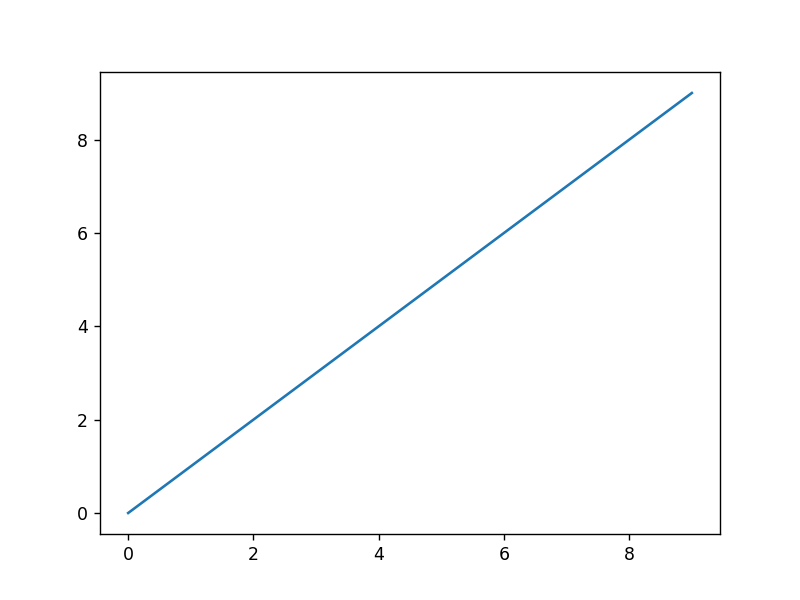

In [5]:
plt.plot(data)

## 7.1 Figures & subplots
Plots reside in a `Figure` object.

<IPython.core.display.Javascript object>


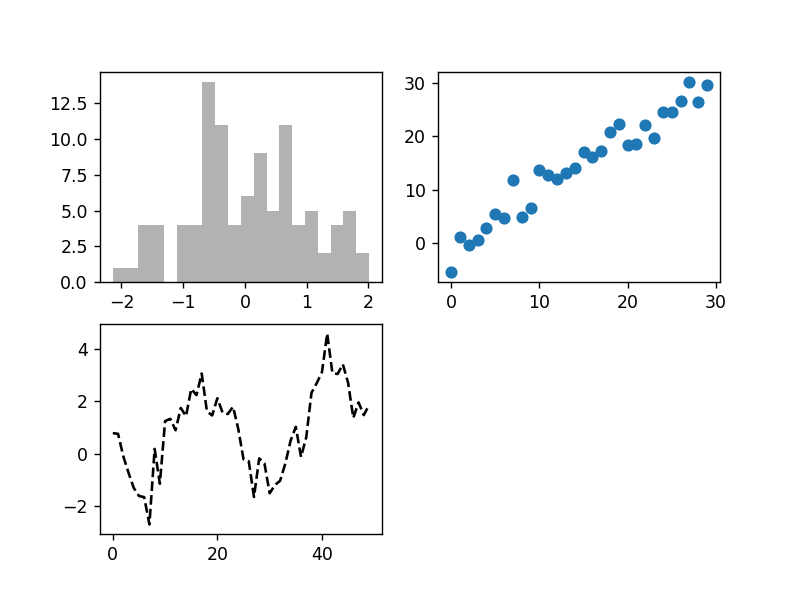

In [18]:
figure = plt.figure()

# We then add subplots to the figure.

# 2 x 2 -- 4 plots total, and numbered from 1
axis1 = figure.add_subplot(2, 2, 1)

axis2 = figure.add_subplot(2, 2, 2)

axis3 = figure.add_subplot(2, 2, 3)

# Now, when we call plot(), it will draw on the last figure/subplot created,
# or create one if necessary.
plt.plot(np.random.randn(50).cumsum(), 'k--')

# Above k-- means black dashed line.
# (k == color, -- == line type)
# Some other styles:
_ = axis1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

axis2.scatter(np.arange(30), np.arange(30)+3 * np.random.randn(30))

<IPython.core.display.Javascript object>


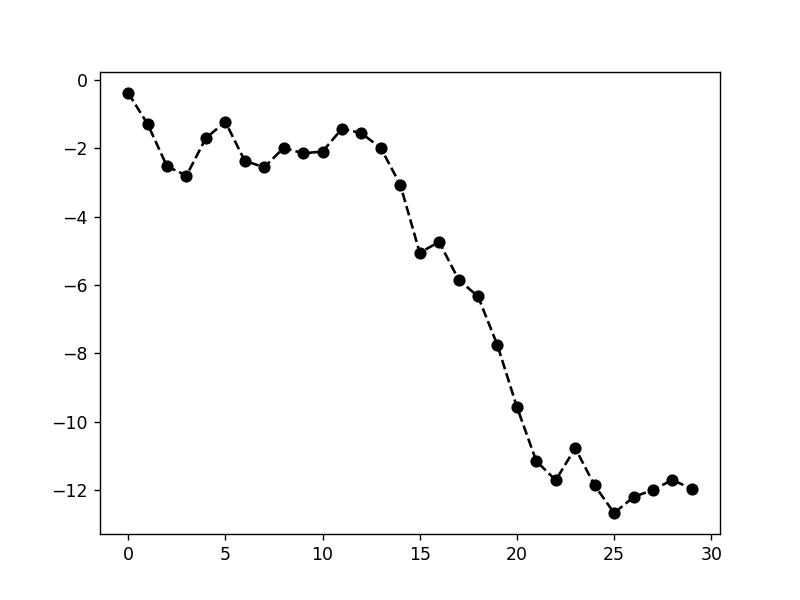

In [19]:
# We can also mark points on the chart
from numpy.random import randn
figure = plt.figure()
plt.plot(randn(30).cumsum(), 'ko--')
# Same as plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')


## 7.2 Title, axis, ticks

<IPython.core.display.Javascript object>


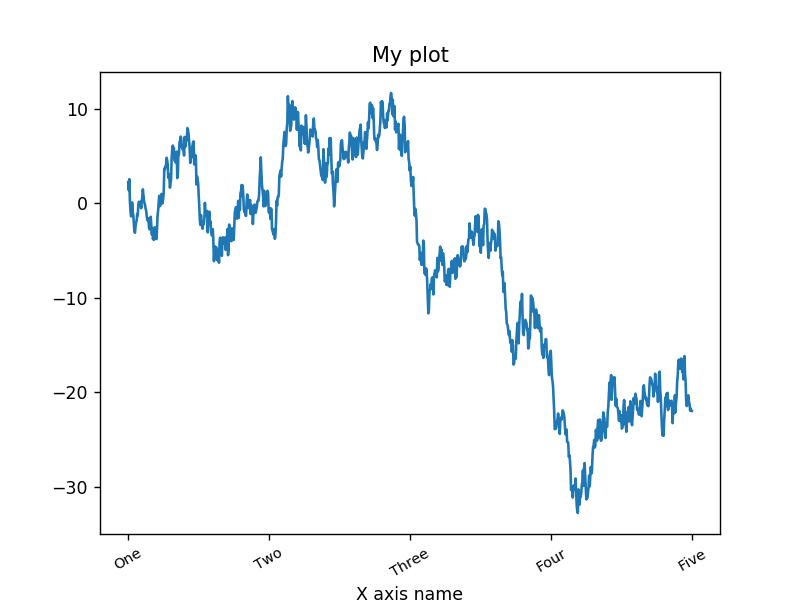

Text(0.5,0,'X axis name')

In [36]:
figure = plt.figure()
axis = figure.add_subplot(1, 1, 1)
axis.plot(np.random.randn(1000).cumsum())

# Set ticks
ticks = axis.set_xticks([0, 250, 500, 750, 1000])

# Name the ticks
labels = axis.set_xticklabels(['One', 'Two', 'Three', 'Four', 'Five'], rotation=30, fontsize='small')

# Name the x-axis
axis.set_title('My plot')

axis.set_xlabel('X axis name')

## 7.3 Adding legends

<IPython.core.display.Javascript object>


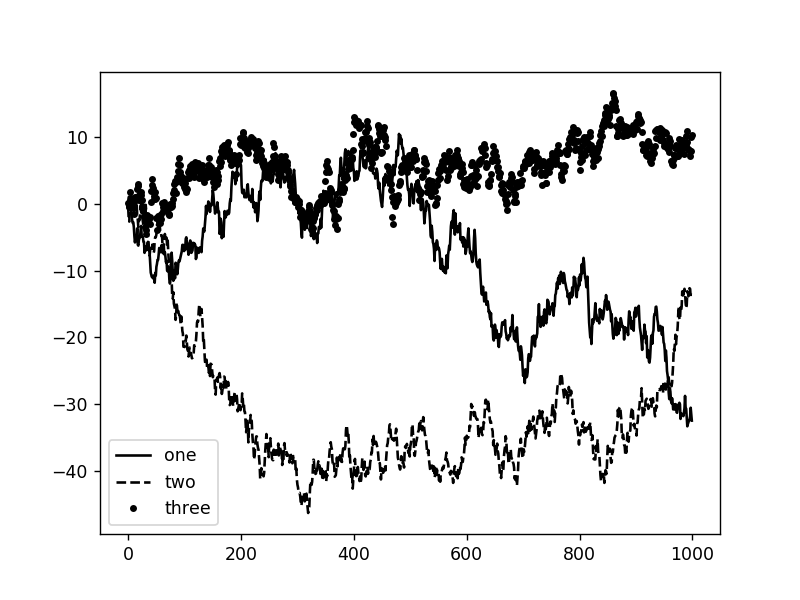

In [38]:
figure = plt.figure()
axis = figure.add_subplot(1, 1, 1)

axis.plot(randn(1000).cumsum(), 'k', label='one')
axis.plot(randn(1000).cumsum(), 'k--', label='two')
axis.plot(randn(1000).cumsum(), 'k.', label='three')

axis.legend(loc='best')

## 7.4 Patches
You can draw common shapes in matplotlib. These shapes are known as _patches_.

<IPython.core.display.Javascript object>


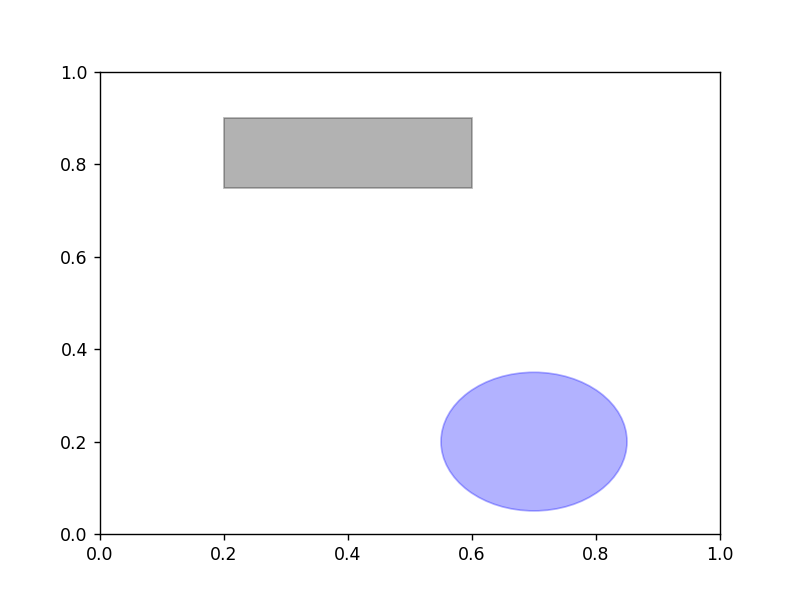

In [39]:
figure = plt.figure()
axis = figure.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circle = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)

axis.add_patch(rect)
axis.add_patch(circle)

# 8. Visualizations with pandas & seaborn
matplotlib is fairly low level. You have to assemble your plots from axis, etc.

pandas and seaborn have functions to simplify plotting.

<IPython.core.display.Javascript object>


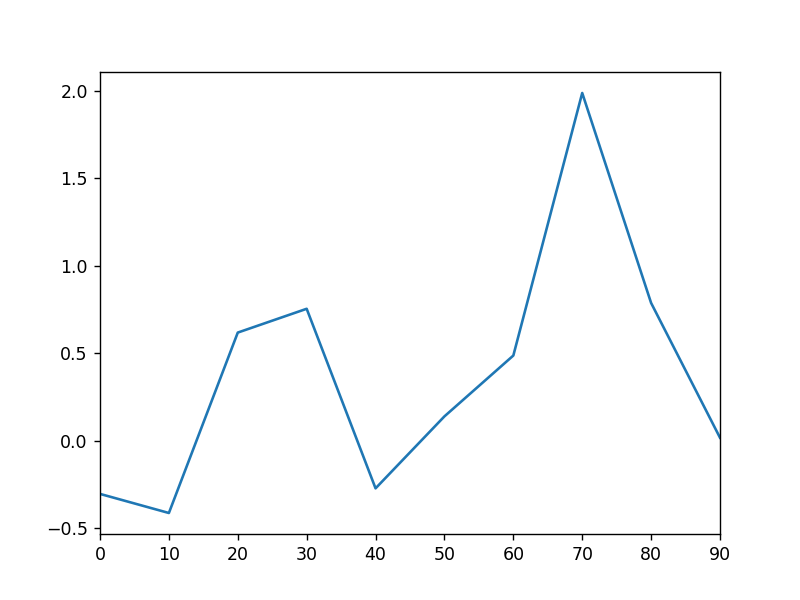

In [43]:
import pandas as pd

series = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

series.plot()

In [45]:
# Note the x-axis is the index
series

0    -0.303330
10   -0.412405
20    0.617998
30    0.753891
40   -0.271621
50    0.139477
60    0.486886
70    1.986234
80    0.787054
90    0.017464
dtype: float64

<IPython.core.display.Javascript object>


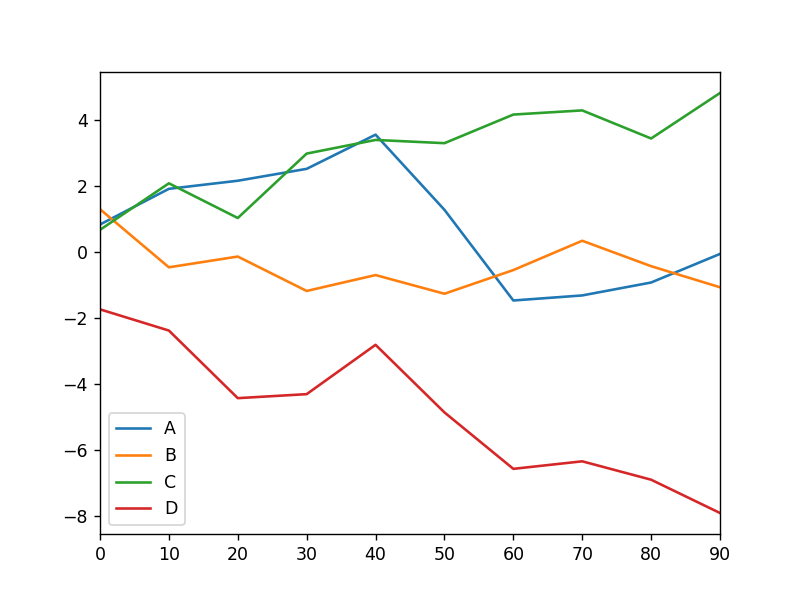

In [47]:
# DataFrames plot each column as a different line, and creates legends automatically
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

df.plot()

In [48]:
df

,A,B,C,D
0,0.836399,1.300128,0.673926,-1.733162
10,1.916951,-0.459805,2.083949,-2.375106
20,2.161651,-0.133747,1.033170,-4.421948
30,2.521924,-1.175973,2.983972,-4.300743
40,3.556656,-0.694478,3.397254,-2.807156
50,1.281373,-1.260244,3.299173,-4.853798
60,-1.464658,-0.543069,4.165703,-6.562813
70,-1.311520,0.344398,4.291854,-6.334884
80,-0.920072,-0.425916,3.441296,-6.891660
90,-0.054593,-1.064468,4.818714,-7.899911


## 8.1 Bar Plots

<IPython.core.display.Javascript object>


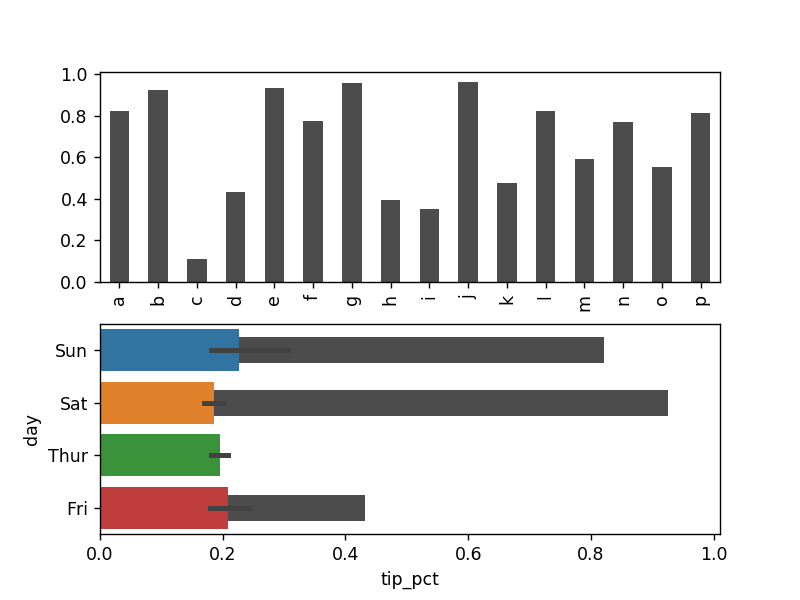

In [51]:
# Get 2 axes to draw on
fig, axes = plt.subplots(2, 1)

# Create a-p items, with random number
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

# Vertical bar chart
data.plot.bar(ax=axes[0], color='k', alpha=0.7)

# Horizontal bar chart
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [53]:
# Bar charts for DataFrames:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

df

Genus,A,B,C,D
one,0.482830,0.446170,0.573991,0.699293
two,0.747576,0.995149,0.829729,0.889507
three,0.259007,0.534389,0.509173,0.922662
four,0.815624,0.563559,0.295791,0.276484
five,0.027037,0.011548,0.508642,0.907514
six,0.094568,0.497155,0.055902,0.786959


<IPython.core.display.Javascript object>


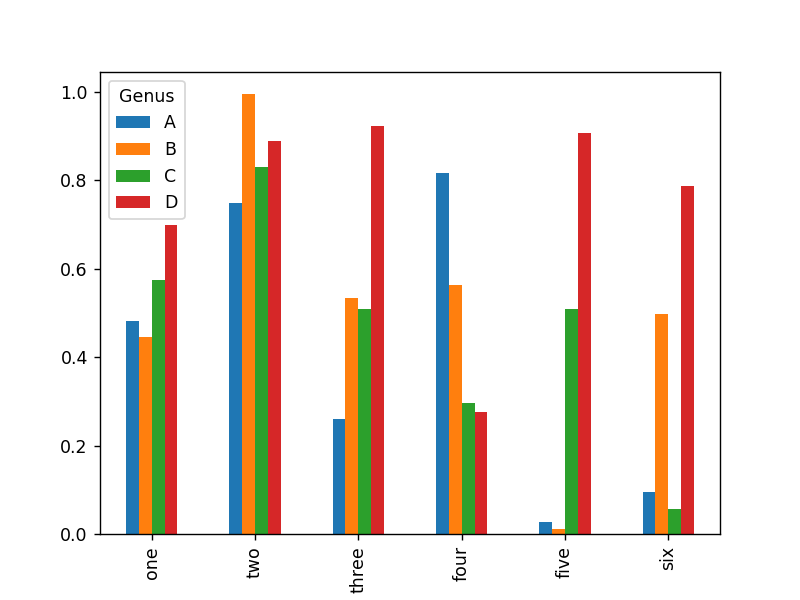

In [55]:
# Note how the column name is used as the legend
df.plot.bar()

<IPython.core.display.Javascript object>


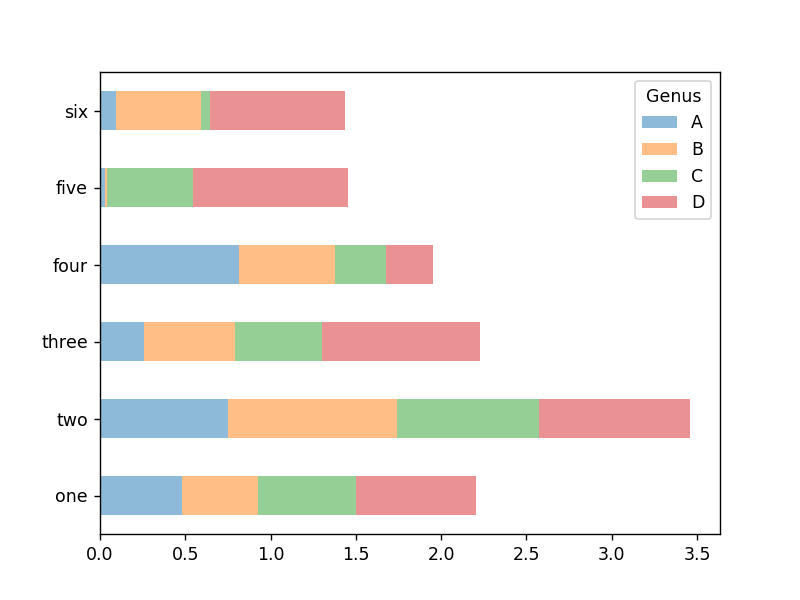

In [56]:
# You can stack bars together by passing stacked=True
df.plot.barh(stacked=True, alpha=0.5)

## 8.2 Example

In [59]:
# Read the file
tips = pd.read_csv('examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [61]:
# Get day x party size
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [63]:
# Get rid of 1 and 6 person parties -- not many
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [65]:
# Normalize the sum to one
# (Divide each element by the sum of the row)
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


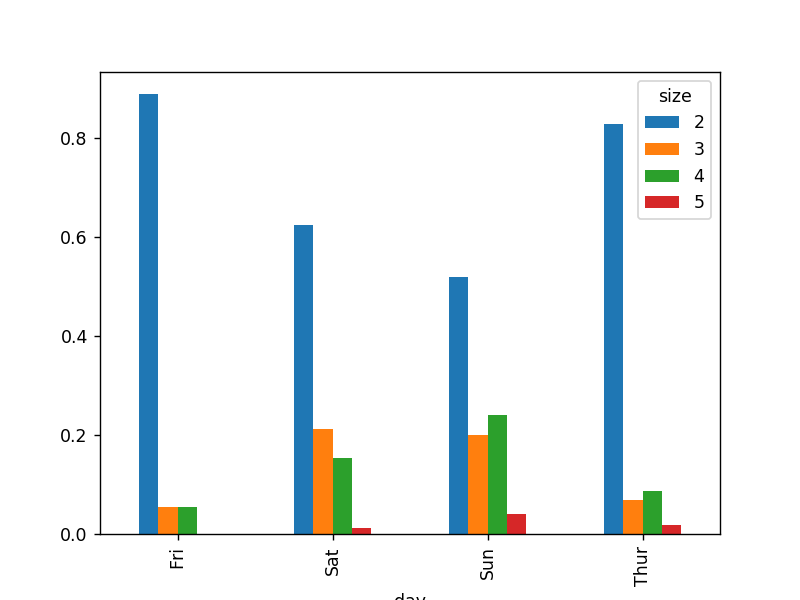

In [67]:
# Then plot it. We see multiple person party sizes get bigger at the weekend.
party_pcts.plot.bar()

## 8.3 seaborn

In [68]:
# seaborn can make things easier.
# Say we wanted to work out tip percentage by day.
import seaborn as sns

tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [70]:
# First get the tips percentage
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


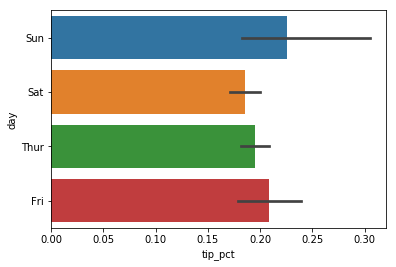

In [75]:
# The black line is the 95% confidence interval (that our true mean value
# if we surveyed EVERYONE has a 95% change of being in this range)
%matplotlib inline
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

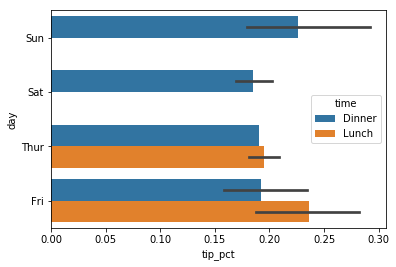

In [76]:
# hue lets us split by another category
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

## 8.4 Scatter/Point plots
Point plots or scatter points are useful for examining the relationship between 1D data series.

In [78]:
# Load some data
macro = pd.read_csv('examples/macrodata.csv')
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [79]:
# Choose a subset of columns
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [81]:
# Compute log difference
trans_data = np.log(data).diff().dropna()
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


Text(0.5,1,'Changes in log m1 versus log unemp')

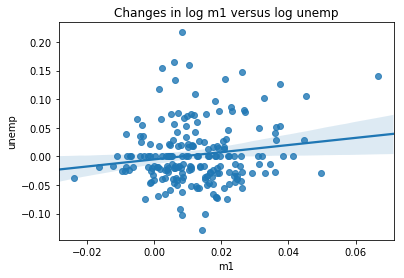

In [84]:
# Then use seaborn's logplot which:
# Makes a scatter plot
# Fits a linear regression line
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

## 8.5 Other libraries
There are plenty of other libraries out there too:

https://bokeh.pydata.org/en/latest/

https://github.com/plotly/plotly.py

# 9. Data Aggregation & Group Operations

GroupBy can often by thought of as:

1. Split: the data into groups based on keys
2. Apply: some function to each group
3. Combine: the the results into some object



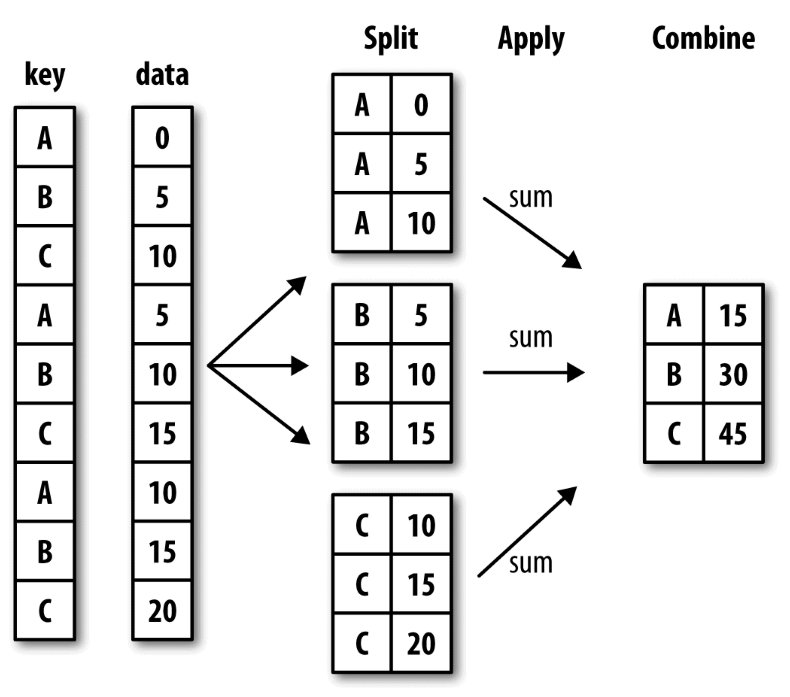

In [5]:
# Example
df = pd.DataFrame({'key1': ['a', 'a', 'b', 'b', 'a'],
                'key2': ['one', 'two', 'one', 'two', 'one'],
                'data1': np.random.randn(5),
                'data2': np.random.randn(5)})

df

,data1,data2,key1,key2
0,2.389249,0.565833,a,one
1,-0.689749,-0.143639,a,two
2,-0.752376,-1.310192,b,one
3,-0.086733,1.345705,b,two
4,0.765564,-0.796593,a,one


In [6]:
# Compute the mean of data1 using key1:
grouped = df['data1'].groupby(df['key1'])

# grouped is a GroupBy object.
grouped

In [7]:
# We can now call functions on it
grouped.mean()

key1
a    0.821688
b   -0.419554
Name: data1, dtype: float64

In [8]:
# We can also group by multiple columns/keys
means = df['data1'].groupby([df['key1'], df['key2']]).mean()

means

key1  key2
a     one     1.577406
      two    -0.689749
b     one    -0.752376
      two    -0.086733
Name: data1, dtype: float64

In [9]:
# We can unstack the hierarchical index into a DataFrame
means.unstack()

key2,one,two
key1,,
a,1.577406,-0.689749
b,-0.752376,-0.086733


In [10]:
# We can groupby arrays of matching lengths
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])

years = np.array([2005, 2005, 2006, 2005, 2006])

df['data1'].groupby([states, years]).mean()

California  2005   -0.689749
            2006   -0.752376
Ohio        2005    1.151258
            2006    0.765564
Name: data1, dtype: float64

In [13]:
# You can also just pass in the column name(s)
# Note, key2 was not included since it was not numeric.
# It is called a NUISANCE COLUMN.
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.821688,-0.124800
b,-0.419554,0.017757


In [14]:
# size() is useful for getting...well, the size of groups
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [15]:
df.groupby('key1').size()

key1
a    3
b    2
dtype: int64

## 9.1 Iterating over groups

In [17]:
for (key1, key2), group in df.groupby(['key1', 'key2']):
    print((key1, key2))
    print(group)

('a', 'one')
      data1     data2 key1 key2
0  2.389249  0.565833    a  one
4  0.765564 -0.796593    a  one
('a', 'two')
      data1     data2 key1 key2
1 -0.689749 -0.143639    a  two
('b', 'one')
      data1     data2 key1 key2
2 -0.752376 -1.310192    b  one
('b', 'two')
      data1     data2 key1 key2
3 -0.086733  1.345705    b  two


## 9.2 Grouping with Dicts and Series

In [22]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])

In [23]:
# Add some NA values
people.iloc[2:3, [1,2]] = np.nan
people

,a,b,c,d,e
Joe,1.067213,0.240540,-1.193339,-0.327164,0.445253
Steve,0.303889,-0.035144,-1.420378,0.417544,0.224822
Wes,1.224232,NaN,NaN,-0.166137,0.026761
Jim,0.855883,0.714477,0.357860,0.871478,0.808388
Travis,-0.013868,1.930534,0.328824,0.682104,-1.206489


In [24]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f': 'orange'}

In [26]:
# Now we can group by our mapping values instead of our data columns
by_column = people.groupby(mapping, axis=1)

by_column.sum()

,blue,red
Joe,-1.520502,1.753005
Steve,-1.002835,0.493568
Wes,-0.166137,1.250993
Jim,1.229338,2.378748
Travis,1.010928,0.710177


In [28]:
# Or we can get the mapping as a series
map_series = pd.Series(mapping)

map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [29]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


## 9.3 Grouping with functions

In [30]:
people

,a,b,c,d,e
Joe,1.067213,0.240540,-1.193339,-0.327164,0.445253
Steve,0.303889,-0.035144,-1.420378,0.417544,0.224822
Wes,1.224232,NaN,NaN,-0.166137,0.026761
Jim,0.855883,0.714477,0.357860,0.871478,0.808388
Travis,-0.013868,1.930534,0.328824,0.682104,-1.206489


In [32]:
# We could group by the length of the names
# When we do groupby functions, the function will be called once per index
# and the group key will be the function result.
people.groupby(len).sum()

,a,b,c,d,e
3,3.147327,0.955017,-0.835479,0.378178,1.280403
5,0.303889,-0.035144,-1.420378,0.417544,0.224822
6,-0.013868,1.930534,0.328824,0.682104,-1.206489


## 9.4 Data Aggregation
Any data transformation that produces scalar values from arrays.

In [33]:
df

,data1,data2,key1,key2
0,2.389249,0.565833,a,one
1,-0.689749,-0.143639,a,two
2,-0.752376,-1.310192,b,one
3,-0.086733,1.345705,b,two
4,0.765564,-0.796593,a,one


In [37]:
grouped = df.groupby('key1')

grouped['data1'].quantile(0.9)

key1
a    2.064512
b   -0.153297
Name: data1, dtype: float64

In [38]:
# You can pass in your own functions to aggregate data using aggregate or agg functions
def peak_to_peak(arr):
    return arr.max() - arr.min()

grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,3.078997,1.362426
b,0.665643,2.655897


## 9.5 Column-wise/multiple functions

In [5]:
# Example:
# Add a column showing tip as a % of the bill
tips = pd.read_csv("examples/tips.csv")

tips["tip_pct"] = tips["tip"] / tips["total_bill"]

tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [7]:
# We might want to group different columns using different functions
# First, group the data by day/smoker
grouped = tips.groupby(['day', 'smoker'])

grouped.sum()

total_bill     tip  size   tip_pct
day  smoker                                    
Fri  No           73.68   11.25     9  0.606602
     Yes         252.20   40.71    31  2.621746
Sat  No          884.78  139.63   115  7.112145
     Yes         893.62  120.77   104  6.212055
Sun  No         1168.88  180.57   167  9.126438
     Yes         458.28   66.82    49  3.557756
Thur No          770.09  120.32   112  7.213414
     Yes         326.24   51.51    40  2.785676

In [11]:
# Then 
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [13]:
# If you want to calculcate multiple stats, pass a list of function names
grouped_pct.agg([('The mean', 'mean'), ('standard dev.', 'std')])

The mean  standard dev.
day  smoker                         
Fri  No      0.151650       0.028123
     Yes     0.174783       0.051293
Sat  No      0.158048       0.039767
     Yes     0.147906       0.061375
Sun  No      0.160113       0.042347
     Yes     0.187250       0.154134
Thur No      0.160298       0.038774
     Yes     0.163863       0.039389

In [14]:
# We can also execute the same functions on different columns
functions = ['min', 'max']

result = grouped['tip_pct', 'total_bill'].agg(functions)

result

tip_pct           total_bill       
                  min       max        min    max
day  smoker                                      
Fri  No      0.120385  0.187735      12.46  22.75
     Yes     0.103555  0.263480       5.75  40.17
Sat  No      0.056797  0.291990       7.25  48.33
     Yes     0.035638  0.325733       3.07  50.81
Sun  No      0.059447  0.252672       8.77  48.17
     Yes     0.065660  0.710345       7.25  45.35
Thur No      0.072961  0.266312       7.51  41.19
     Yes     0.090014  0.241255      10.34  43.11

In [18]:
# If you want to run different functions on different columns,
# pass a dictionary mapping column name to function
grouped.agg({'tip': [min, max], 'size': 'sum'})

tip        size
              min    max  sum
day  smoker                  
Fri  No      1.50   3.50    9
     Yes     1.00   4.73   31
Sat  No      1.00   9.00  115
     Yes     1.00  10.00  104
Sun  No      1.01   6.00  167
     Yes     1.50   6.50   49
Thur No      1.25   6.70  112
     Yes     2.00   5.00   40

## 9.6 Apply
Earlier we discussed:

1. Splitting an object into pieces
2. Applying the function to each piece
3. Combining the pieces back together

This can be done with `apply`.

In [21]:
# Suppose we wanted to select the top 5 tip_pct values by group
# First, get the larged values for that column
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [22]:
# Now, we can group by smoker and then APPLY this function
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [24]:
# You can also override the default parameters
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [26]:
# Use describe to get a breakdown on a particular group/column
tips.groupby('smoker')['tip_pct'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


## 9.8 Quantile analysis with groupby

In [29]:
# Recall that we can use CUT and QCUT to split data into quantiles, etc.
frame = pd.DataFrame({'data1': np.random.randn(10),
                      'data2': np.random.randn(10)})

frame

,data1,data2
0,1.219437,-0.494191
1,-0.276870,-0.278891
2,2.691462,0.164667
3,-1.965449,0.533441
4,0.684654,-0.627674
5,-0.718489,0.969028
6,0.469983,1.723343
7,-1.022472,-0.033296
8,0.872181,0.326529
9,-0.875838,0.292229


In [31]:
quartiles = pd.cut(frame.data1, 4)
quartiles

0     (0.363, 1.527]
1    (-0.801, 0.363]
2     (1.527, 2.691]
3    (-1.97, -0.801]
4     (0.363, 1.527]
5    (-0.801, 0.363]
6     (0.363, 1.527]
7    (-1.97, -0.801]
8     (0.363, 1.527]
9    (-1.97, -0.801]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-1.97, -0.801] < (-0.801, 0.363] < (0.363, 1.527] < (1.527, 2.691]]

In [32]:
# We can then pass in the Categorical object generated by cut
# to group by, and so calculate stats for our quartiles
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

grouped = frame.data2.groupby(quartiles)

grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-1.97, -0.801]",3.0,0.533441,0.264124,-0.033296
"(-0.801, 0.363]",2.0,0.969028,0.345068,-0.278891
"(0.363, 1.527]",4.0,1.723343,0.232002,-0.627674
"(1.527, 2.691]",1.0,0.164667,0.164667,0.164667


## 9.9 Random sampling/distribution

In [9]:
# Support we wanted to draw a random sample from a large dataset.
# There are a bunch of ways to do this.
# For example, using the SAMPLE method for Series.

import pandas as pd

# Let's say we have a pack of playing cards:
# Hearts, Spaces, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4

card_val[:14]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1]

In [11]:
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']

base_names

['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'K', 'Q']

In [12]:
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)
    
deck = pd.Series(card_val, index=cards)

deck.head()

AH    1
2H    2
3H    3
4H    4
5H    5
dtype: int64

In [13]:
# You could draw 5 cards like this:
def draw(deck, n=5):
    return deck.sample(n)

draw(deck)

10C    10
KD     10
6S      6
4H      4
3H      3
dtype: int64

In [14]:
# What if we wanted 2 random cards from each suit?

# The suit is the last char of each card name, so we can group based on this
# then use apply.
get_suit = lambda card: card[-1]

deck.groupby(get_suit).apply(draw, n=2)

C  5C      5
   2C      2
D  4D      4
   KD     10
H  8H      8
   QH     10
S  KS     10
   10S    10
dtype: int64

## 9.10 Pivot tables/cross tabulation
Pivot tables are basically a data summary with keys found along the rows and/or columns. In Python, they basically work by making a hierarchical indexing using groupby.

In [17]:
tips = pd.read_csv('examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [19]:
# Create hierarchical index of day/smoker
tips.pivot_table(index=['day', 'smoker'])

size       tip  total_bill
day  smoker                                
Fri  No      2.250000  2.812500   18.420000
     Yes     2.066667  2.714000   16.813333
Sat  No      2.555556  3.102889   19.661778
     Yes     2.476190  2.875476   21.276667
Sun  No      2.929825  3.167895   20.506667
     Yes     2.578947  3.516842   24.120000
Thur No      2.488889  2.673778   17.113111
     Yes     2.352941  3.030000   19.190588

In [23]:
# Get the frequency of groups
tips.pivot_table('total_bill', index=['time', 'smoker'], columns='day',
                 aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

A cross tabulation (crosstab) is a special kind of pivot table
It computes group frequencies.

For example, given a list  of country/left or right-handedness,
you could work out the total left/right handedness for each country.

# 10. Time Series
Anything measured at fixed points in time forms a time series.

A time series measured at fixed points in time is _fixed frequency_. If there is no fixed unit of time, the time series is _irregular_.

In [25]:
# Quick datetime reminder
from datetime import datetime

# delta gives you the difference
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [26]:
delta

datetime.timedelta(926, 56700)

In [27]:
delta.days

926

In [28]:
delta.seconds

56700

In [33]:
# timedelta can be used to add or subtract
from datetime import timedelta
start = datetime(2017, 12, 12)

start + timedelta(12)

datetime.datetime(2017, 12, 24, 0, 0)

In [34]:
# Converting datetime to string
timestamp = datetime(2017, 12, 17)

str(timestamp)

'2017-12-17 00:00:00'

In [35]:
timestamp.strftime('%Y-%m-%d')

'2017-12-17'

In [37]:
# Converting strings to datetimes
date_str = '2017-12-12'

datetime.strptime(date_str, '%Y-%m-%d')

datetime.datetime(2017, 12, 12, 0, 0)

In [38]:
# the dateutil.parser package can parse most date formats
from dateutil.parser import parse
parse('2017, 01, 01')

datetime.datetime(2017, 1, 1, 0, 0)

In [39]:
# pandas to_datetime method parses an array of dates
date_strs = ['2012-01-01', '2016, 12, 12']

pd.to_datetime(date_strs)

DatetimeIndex(['2012-01-01', '2016-12-12'], dtype='datetime64[ns]', freq=None)

## 10.1 Time Series Basics
A basic pandas time series can be a series indexed by timestamps, represented as strings or `datetime` objects.

In [41]:
import numpy as np

dates = [datetime(2017, 1, 1), datetime(2017, 1, 2),
         datetime(2017, 1, 3), datetime(2017, 1, 4),
         datetime(2017, 1, 5), datetime(2017, 1, 6)]

time_series = pd.Series(np.random.randn(6), index=dates)

time_series

2017-01-01    2.575412
2017-01-02   -0.305330
2017-01-03   -0.293339
2017-01-04    0.135879
2017-01-05    0.406859
2017-01-06   -0.486358
dtype: float64

In [43]:
# Note, the index created here is a DateTimeIndex
time_series.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06'],
              dtype='datetime64[ns]', freq=None)

In [45]:
# You can use the Timestamp like a normal index
timestamp = time_series.index[2]
time_series[timestamp]

-0.29333923194221934

In [50]:
# You can create a date range when creating the series
time_series = pd.Series(np.random.randn(1000), 
                        index=pd.date_range('1/1/2000',
                        periods=1000))

time_series.head()

2000-01-01    1.202676
2000-01-02   -0.571488
2000-01-03   -0.155544
2000-01-04    0.142310
2000-01-05    1.758497
Freq: D, dtype: float64

In [51]:
time_series['2001']

2001-01-01   -1.964298
2001-01-02    1.820050
2001-01-03    0.472530
2001-01-04    0.329925
2001-01-05    1.189332
2001-01-06    0.942521
2001-01-07   -1.696542
2001-01-08   -0.841883
2001-01-09    1.086309
2001-01-10    1.480453
2001-01-11   -0.149783
2001-01-12    0.764645
2001-01-13    0.255209
2001-01-14   -0.727008
2001-01-15   -0.520093
2001-01-16   -0.575796
2001-01-17    1.724887
2001-01-18   -0.162568
2001-01-19    0.269693
2001-01-20   -0.379900
2001-01-21    0.408111
2001-01-22   -0.976049
2001-01-23    0.540458
2001-01-24   -2.196888
2001-01-25   -0.629126
2001-01-26   -0.603044
2001-01-27   -0.100907
2001-01-28   -0.403676
2001-01-29   -0.955137
2001-01-30   -0.169792
                ...   
2001-12-02    0.444755
2001-12-03    0.892449
2001-12-04    0.092687
2001-12-05   -1.450807
2001-12-06    1.486990
2001-12-07    0.931177
2001-12-08    0.453868
2001-12-09    0.241247
2001-12-10    1.902435
2001-12-11    0.199844
2001-12-12   -0.847096
2001-12-13    0.072677
2001-12-14 

In [52]:
time_series['2001-05']

2001-05-01   -2.148348
2001-05-02   -0.294658
2001-05-03   -0.601788
2001-05-04   -0.980454
2001-05-05   -0.821171
2001-05-06    0.608482
2001-05-07    0.230141
2001-05-08   -0.441536
2001-05-09    0.909597
2001-05-10   -1.164058
2001-05-11   -0.428842
2001-05-12    0.919166
2001-05-13   -1.415773
2001-05-14   -1.246302
2001-05-15    0.385963
2001-05-16   -0.830422
2001-05-17   -0.874091
2001-05-18   -0.618177
2001-05-19   -0.424664
2001-05-20    0.014291
2001-05-21   -0.615593
2001-05-22   -1.021724
2001-05-23   -1.469970
2001-05-24    0.551405
2001-05-25    0.394279
2001-05-26    1.601324
2001-05-27    0.822191
2001-05-28   -1.260995
2001-05-29   -1.367441
2001-05-30    0.038437
2001-05-31   -0.920598
Freq: D, dtype: float64

In [54]:
# You can slice with datetime objects
dates = [datetime(2017, 1, 1), datetime(2017, 1, 2),
         datetime(2017, 1, 3), datetime(2017, 1, 4),
         datetime(2017, 1, 5), datetime(2017, 1, 6)]

time_series = pd.Series(np.random.randn(6), index=dates)
time_series

2017-01-01   -0.503967
2017-01-02   -1.373703
2017-01-03    0.167198
2017-01-04    0.445717
2017-01-05   -1.040186
2017-01-06   -1.086614
dtype: float64

In [55]:
time_series[datetime(2017, 1, 4):]

2017-01-04    0.445717
2017-01-05   -1.040186
2017-01-06   -1.086614
dtype: float64

In [56]:
# You can also slice using timestamps that aren't in your series exactly
time_series['2017-01-03':'2017-01-07']

2017-01-03    0.167198
2017-01-04    0.445717
2017-01-05   -1.040186
2017-01-06   -1.086614
dtype: float64

In [58]:
# Likewise, DataFrames can be indexed on their rows
dates = pd.date_range('1/1/2000', periods = 20, freq='W-WED')

long_dataframe = pd.DataFrame(np.random.randn(20, 4),
                              index=dates,
                              columns=['Colorado', 'Texas', 'New York', 'Ohio'])

long_dataframe

,Colorado,Texas,New York,Ohio
2000-01-05,0.345350,0.609873,-0.422699,0.555068
2000-01-12,0.672536,1.841863,1.072069,0.849903
2000-01-19,-0.196928,0.952243,-1.400611,-0.300366
2000-01-26,-0.392601,0.759199,0.933740,0.090165
2000-02-02,-0.865781,0.137048,2.092271,0.237251
2000-02-09,-0.136592,1.340993,0.742884,0.581838
2000-02-16,-0.923563,1.643122,0.324110,0.903303
2000-02-23,0.572033,1.168222,-0.324425,-0.920321
2000-03-01,2.570024,-0.202751,-0.867264,1.231287
2000-03-08,-0.269481,-0.660963,-1.522546,0.277498


### 10.1.1 Non-unique timestamp index
Sometimes there might be multiple samples for a specific timestamp.

In [2]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])

duplicate_time_series = pd.Series(np.arange(5), index=dates)

duplicate_time_series

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [63]:
# Check if it's unique
duplicate_time_series.index.is_unique

False

In [64]:
duplicate_time_series['2000-01-02']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [65]:
# You could group the dupes into one date
grouped = duplicate_time_series.groupby(level=0)

grouped.sum()

2000-01-01    0
2000-01-02    6
2000-01-03    4
dtype: int32

### 10.1.2 Date ranges/frequencies/shifting
Many time series might be irregular, but you can use pandas to make a regular time series with missing values if need be, etc.

In [3]:
dates = pd.DatetimeIndex(['1/1/2000', '1/3/2000', '1/5/2000', '1/7/2000', '1/9/2000'])

time_series = pd.Series(np.arange(5), index=dates)

time_series

2000-01-01    0
2000-01-03    1
2000-01-05    2
2000-01-07    3
2000-01-09    4
dtype: int32

In [5]:
# Resample as daily
resampler = time_series.resample('D')
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [7]:
# date_range gets a Datetimendex with a particular frequency
index = pd.date_range('2012-04-01', '2012-06-01')

index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [8]:
# Or we can generate a date range with just a start/end
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

There are also many functions to calculate, e.g., last business day of the month, business daily, etc.

In [9]:
# If you want to normalize the time stamps, use normalize:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 10.1.3 Frequencies/date offsets

Note: Some frequencies are not evenly spaced, like `BM` -- last business/weekday of the month. This depends on whether the month ends on a weekend, etc.

These unevenly spaced frequencies are called __anchored__ offsets.

In [14]:
from pandas.tseries.offsets import Hour, Minute

# Use a 4-hourly offset
pd.date_range('2020-01-01', '2020-02-01 23:59', freq='4h30min')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 04:30:00',
               '2020-01-01 09:00:00', '2020-01-01 13:30:00',
               '2020-01-01 18:00:00', '2020-01-01 22:30:00',
               '2020-01-02 03:00:00', '2020-01-02 07:30:00',
               '2020-01-02 12:00:00', '2020-01-02 16:30:00',
               ...
               '2020-01-31 04:30:00', '2020-01-31 09:00:00',
               '2020-01-31 13:30:00', '2020-01-31 18:00:00',
               '2020-01-31 22:30:00', '2020-02-01 03:00:00',
               '2020-02-01 07:30:00', '2020-02-01 12:00:00',
               '2020-02-01 16:30:00', '2020-02-01 21:00:00'],
              dtype='datetime64[ns]', length=171, freq='270T')

In [16]:
# WOM lets you get week of the month.
# For example, every 3rd Friday
rng = pd.date_range('2017-01-01', '2017-06-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2017-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2017-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2017-03-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2017-04-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2017-05-19 00:00:00', freq='WOM-3FRI')]

### 10.1.4 Shifting (leading and lagging) Data
Shifting = moving data back/forward through time.

In [17]:
time_series = pd.Series(np.random.randn(4),
                        index=pd.date_range('1/1/2018', periods=4, freq='M'))

time_series

2018-01-31   -0.319394
2018-02-28   -1.305663
2018-03-31    0.885787
2018-04-30   -0.908266
Freq: M, dtype: float64

In [19]:
# shift leaves the index in-tact, but moves the values down two,
# producing missing values
time_series.shift(2)

2018-01-31         NaN
2018-02-28         NaN
2018-03-31   -0.319394
2018-04-30   -1.305663
Freq: M, dtype: float64

In [20]:
# Likewise for moving data backwards:
time_series.shift(-2)

2018-01-31    0.885787
2018-02-28   -0.908266
2018-03-31         NaN
2018-04-30         NaN
Freq: M, dtype: float64

In [23]:
# We can also pass in a frequency to move the index forward, leaving
# the data unchanged
time_series.shift(2, freq='M')

2018-03-31   -0.319394
2018-04-30   -1.305663
2018-05-31    0.885787
2018-06-30   -0.908266
Freq: M, dtype: float64

## 10.2 Periods
Periods represent timespans. Days, months, years, etc.

In [5]:
# Here the period is from Jan-1, 2007 - Dec-21, 2007
period = pd.Period(2007, freq='A-DEC')
period

Period('2007', 'A-DEC')

In [6]:
period + 5

Period('2012', 'A-DEC')

In [8]:
period - 2

Period('2005', 'A-DEC')

In [9]:
# You can create a period index like this:
period_range = pd.period_range('2000-01-01', '2000-06-30', freq='M')
period_range

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [13]:
# You can then use this as an axis index
pd.Series(np.random.randn(6), index=period_range)

2000-01   -0.146702
2000-02   -0.974083
2000-03   -0.518999
2000-04    0.196535
2000-05    0.879362
2000-06    0.251939
Freq: M, dtype: float64

In [14]:
# We can also convert periods to another frequency
period = pd.Period('2007', freq='A-DEC')
period

Period('2007', 'A-DEC')

In [15]:
period.asfreq('M', how='start')

Period('2007-01', 'M')

In [16]:
period.asfreq('M', how='end')

Period('2007-12', 'M')

In [17]:
# We can also create a PeriodIndex from Arrays
# Imagine we had year and quarter in different columns
data = pd.read_csv('examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [19]:
# Now pass in the year and quarter arrays with a frequency,
# and they can be combined for an index for the DataFrame
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [20]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 10.3 Resampling and frequency conversion
_Resampling_ = converting a time series to another frequency

_Downsampling_ = converting to lower frequency

_Upsampling_ = converting to higher frequency

In [23]:
range = pd.date_range('2000-01-01', periods=100, freq='D')
time_series = pd.Series(np.random.randn(len(range)), index=range)

time_series.head()

2000-01-01   -0.926510
2000-01-02   -1.056738
2000-01-03   -1.012822
2000-01-04   -0.072222
2000-01-05    0.059743
Freq: D, dtype: float64

In [25]:
# Resample to monthly, and calculate the mean -- it's kinda like groupby
time_series.resample('M').mean()

2000-01-31   -0.003838
2000-02-29   -0.030212
2000-03-31   -0.156988
2000-04-30    0.143581
Freq: M, dtype: float64

In [26]:
# When downsampling, we must consider -- which side of the interval is closed,
# how to label each aggregated bn -- with start of interval or the end
range = pd.date_range('2000-01-01', periods=12, freq='T')

time_series=pd.Series(np.arange(12), index=range)

time_series

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [28]:
# Say we wanted to downsample to 5-minute intervals
time_series.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [29]:
# Closing on the right (includes 05:00)
time_series.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [30]:
# Upsampling
# First, imagine a DataFrame with weekly data
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.352700,-1.094161,-0.972645,1.740611
2000-01-12,0.557466,1.408665,0.533462,-1.120774


In [32]:
# Now, we can upsample, but obviously there will be missing data
daily_frame = frame.resample('D').asfreq()
daily_frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.352700,-1.094161,-0.972645,1.740611
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.557466,1.408665,0.533462,-1.120774


In [33]:
# You can use weekly value in using ffill(), etc.
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.352700,-1.094161,-0.972645,1.740611
2000-01-06,-0.352700,-1.094161,-0.972645,1.740611
2000-01-07,-0.352700,-1.094161,-0.972645,1.740611
2000-01-08,-0.352700,-1.094161,-0.972645,1.740611
2000-01-09,-0.352700,-1.094161,-0.972645,1.740611
2000-01-10,-0.352700,-1.094161,-0.972645,1.740611
2000-01-11,-0.352700,-1.094161,-0.972645,1.740611
2000-01-12,0.557466,1.408665,0.533462,-1.120774


## 10.4 Moving Window Functions

In [37]:
close_px_all = pd.read_csv('examples/stock_px_2.csv', parse_dates=True, index_col=0)

close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


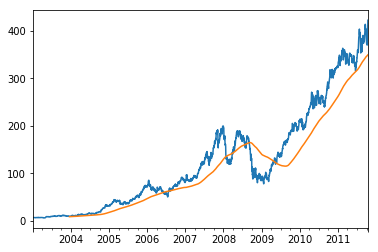

In [43]:
# Resample to business day
%matplotlib inline
close_px = close_px.resample('B').ffill()
close_px.AAPL.plot()

# rolling is like resample and groupby. It can be called with a WINDOW --
# expressed as a number of periods.
# Here we have a 250-day moving window average of Apple's stock price.
close_px.AAPL.rolling(250).mean().plot()

In [45]:
# 20-day rolling mean:
close_px.rolling('20D').mean().head()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000


# 11. Advanced pandas

## 11.1 Categorical Data

In [2]:
values = pd.Series(['apple', 'orange', 'apple', 'apple'] * 2)
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [3]:
# To calculcate unique values/counts
pd.unique(values)

array(['apple', 'orange'], dtype=object)

In [4]:
pd.value_counts(values)

apple     6
orange    2
dtype: int64

In [6]:
# In data warehousing, a best practice is to use a dimension table. It stores the distinct values.
# Then use another array of integer keys referencing that table.
values = pd.Series([0, 1, 0, 0] * 2)
dimension_table = pd.Series(['apple', 'orange'])

# Then use the TAKE method to restore the original Series
dimension_table.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

The above is a _categorical_ or _dictionary-encoded representation_.

`dimension_table` = _categories_, _dictionary_, or _levels_ or data

`values` (integer values that reference categories) = _category codes_ or _codes_

This approach makes renaming categories or appending a category without changing the order of the existing categories relatively low cost.

pandas has a `Categorical` type for holding this integer-based encoding.

In [12]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2

N = len(fruits)

df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                   'count': np.random.randint(3, 15, size=N),
                   'weight': np.random.uniform(0, 4, size=N)},
                  columns=['basket_id', 'fruit', 'count', 'weight'])

df

,basket_id,fruit,count,weight
0,0,apple,6,2.194900
1,1,orange,14,0.342225
2,2,apple,13,0.141535
3,3,apple,4,3.418580
4,4,apple,11,3.604183
5,5,orange,5,0.569117
6,6,apple,10,1.299096
7,7,apple,9,3.288123


In [13]:
# df['fruit'] gives us an array of Python strings
df['fruit']

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: object

In [14]:
# We can convert it to a category like this:
fruit_cat = df['fruit'].astype('category')

fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

In [17]:
# fruit_cat.Values are Categorical typ. This has categories and codes attributes
# corresponding to our categories and codes in our dimension table
fruit_cat.values.categories

Index(['apple', 'orange'], dtype='object')

In [18]:
fruit_cat.values.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [19]:
# So you could convert a column to categorical by just assigning the conversation
df['fruit'] = df['fruit'].astype('category')

df.fruit

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

In [20]:
# You can also create a Categorical directly
categories = pd.Categorical(['a', 'b', 'c', 'b', 'a'])
categories

[a, b, c, b, a]
Categories (3, object): [a, b, c]

In [21]:
# If you have categorical data and you want to decode it:
categories = ['a', 'b', 'c']
codes = [0, 1, 2, 0, 0, 1, 1]

decoded = pd.Categorical.from_codes(codes, categories)
decoded

[a, b, c, a, a, b, b]
Categories (3, object): [a, b, c]

## 11.2 Categorical Computations

In [24]:
np.random.seed(12345)

draws = np.random.randn(1000)

draws[:5]

array([-0.20470766,  0.47894334, -0.51943872, -0.5557303 ,  1.96578057])

In [27]:
# Let's take the quartile bins:
bins = pd.qcut(draws, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
bins

[Q2, Q3, Q2, Q2, Q4, ..., Q3, Q2, Q1, Q3, Q4]
Length: 1000
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

In [28]:
# We can see we can access the dimension table codes
bins.codes[:10]

array([1, 2, 1, 1, 3, 3, 2, 2, 3, 3], dtype=int8)

In [30]:
# Now we can use groupby to calculate stats on our quartile bins
bins = pd.Series(bins, name='quartile')

results = (pd.Series(draws)
           .groupby(bins)
           .agg(['count', 'min', 'max'])
           .reset_index())

results

,quartile,count,min,max
0,Q1,250,-2.949343,-0.685484
1,Q2,250,-0.683066,-0.010115
2,Q3,250,-0.010032,0.628894
3,Q4,250,0.634238,3.927528


A categorical version of a DataFrame can give performance gains and use less memory.

GroupBy operations will also be faster since they can use integer-based codes instead of a string array.

There are also special functions to add/remove unused categories in your data set, etc.

In [33]:
# For example, imagine we had 10,000,000 elements, but a small number of categories

N = 10000000

draws = pd.Series(np.random.randn(N))

labels = pd.Series(['a', 'b', 'c', 'd'] * (N // 4))

# Now, each of our labels can only be a-d, so convert it to a category
categories = labels.astype('category')

In [34]:
labels.memory_usage()

80000080

In [35]:
categories.memory_usage()

10000272

## 11.3 Dummy Variables
In machine learning, we often transform categories into _dummy variables_, aka, _one-hot encoding_.

Reminder: Essentially transforming a column of categories with multiple values into multiple columns each of which is either 0 or 1, in order not to mess up meachine learning training.

In [36]:
categories = pd.Series(['a', 'b', 'c', 'd'] * 2, dtype='category')
categories

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): [a, b, c, d]

In [37]:
# transform to dummies/one-hot encode
pd.get_dummies(categories)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


## 11.4 Method chaining

In [39]:
# Assign lets you take a copy and reassign a column.
# It makes method chaining easier.

data = pd.DataFrame({'key': np.arange(7),
                     'values': np.random.randn(7)})

data

,key,values
0,0,-0.402644
1,1,0.978667
2,2,-1.497836
3,3,-1.840469
4,4,0.996208
5,5,1.354645
6,6,-1.382725


In [52]:
# Non-function way:
linear_values = pd.Series([1, 2, 3, 4, 5, 6, 7])

data2 = data.copy()
data2['values'] = linear_values

data2

,key,values
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5
5,5,6
6,6,7


In [53]:
# Functional assign way
data2 = data.assign(values=linear_values)
data2

,key,values
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5
5,5,6
6,6,7


In [58]:
# The functional approach makes method chaining easier
result = (data2.assign(key=values*3+values-1))

result

,key,values
0,3,1
1,7,2
2,11,3
3,15,4
4,19,5
5,23,6
6,27,7


# 12. Modeling Libraries
Often:

* pandas: data loading and cleaning
* some other modeling library: actually model the data

__Feature engineering__: Using data transformation/analytics to extract information from a dataset that may be useful in a modeling context.

I.e., produce additional relevant features from existing raw features in the data, in order to increase predictive powers of the algorithm.

__Feature selection__: Selecting the key subset of original data features.

In [59]:
# The interface between pands and other libraries is usually NumPy arrays.
# Use .values to turn a DataFrame into a NumPy array.

data = pd.DataFrame({
    'x0': [1, 2, 3, 4, 5],
    'x1': [0.01, -0.01, 0.25, -4.1, 0.0],
    'y': [-1.5, 0.0, 3.6, 1.3, -3]
})

data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-3.0


In [60]:
data.columns

Index(['x0', 'x1', 'y'], dtype='object')

In [61]:
data.values

array([[ 1.  ,  0.01, -1.5 ],
       [ 2.  , -0.01,  0.  ],
       [ 3.  ,  0.25,  3.6 ],
       [ 4.  , -4.1 ,  1.3 ],
       [ 5.  ,  0.  , -3.  ]])

In [63]:
# To convert from a NumPy array:
data2 = pd.DataFrame(data.values, columns=['one', 'two', 'three'])

data2

,one,two,three
0,1.0,0.01,-1.5
1,2.0,-0.01,0.0
2,3.0,0.25,3.6
3,4.0,-4.10,1.3
4,5.0,0.00,-3.0


In [64]:
# If you only want a subset of columns, use loc
model_columns = ['x0', 'y']

data.loc[:, model_columns].values

array([[ 1. , -1.5],
       [ 2. ,  0. ],
       [ 3. ,  3.6],
       [ 4. ,  1.3],
       [ 5. , -3. ]])

In [65]:
# Suppose we had non-numerical data in one column
data['category'] = pd.Categorical(['a', 'b', 'a', 'a', 'b'], categories=['a', 'b'])

data

,x0,x1,y,category
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,a
3,4,-4.10,1.3,a
4,5,0.00,-3.0,b


In [66]:
# Now say we wanted to replace this column with dummy variables (one-hot encoding)
# 1. Create dummy varables
# 2. Drop the category column
# 3. Join the result

dummies = pd.get_dummies(data.category, prefix='category')

data_with_dummies = data.drop('category', axis=1).join(dummies)

data_with_dummies

,x0,x1,y,category_a,category_b
0,1,0.01,-1.5,1,0
1,2,-0.01,0.0,0,1
2,3,0.25,3.6,1,0
3,4,-4.10,1.3,1,0
4,5,0.00,-3.0,0,1


## 12.1 Patsy
A library for descriing statistical models.

Uses string-based formula syntax.

__Design matrix__: Rows represent objects, columns represent values.
Aka, regressor matrix or model matrix.

In Patsy, `a + b` does not mean add a to b, but that these are terms in the design matrix.

In [68]:
data = pd.DataFrame({
    'x0': [1, 2, 3, 4, 5],
    'x1': [0.01, -0.01, 0.25, -4.1, 0.0],
    'y': [-1.5, 0.0, 3.6, 1.3, -2.0]
})

data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [69]:
import patsy

In [71]:
y, X = patsy.dmatrices('y ~ x0 + x1', data)

In [72]:
y

DesignMatrix with shape (5, 1)
     y
  -1.5
   0.0
   3.6
   1.3
  -2.0
  Terms:
    'y' (column 0)

In [73]:
X

DesignMatrix with shape (5, 3)
  Intercept  x0     x1
          1   1   0.01
          1   2  -0.01
          1   3   0.25
          1   4  -4.10
          1   5   0.00
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'x1' (column 2)

In [74]:
# You can mix Python code into Patsy formulas
y, X = patsy.dmatrices('y ~ x0 + np.abs(x1)', data)
X

DesignMatrix with shape (5, 3)
  Intercept  x0  np.abs(x1)
          1   1        0.01
          1   2        0.01
          1   3        0.25
          1   4        4.10
          1   5        0.00
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'np.abs(x1)' (column 2)

In [76]:
# Patsy will transform non-numeric data to dummy variables by default
data = pd.DataFrame({
    'key1': ['a', 'a', 'b', 'b', 'a', 'b', 'a', 'b'],
    'key2': [0, 1, 0, 1, 0, 1, 0, 0],
    'v1': [1, 2, 3, 4, 5, 6, 7, 8],
    'v2': [-1, 0, 2.5, -0.5, 4.0, -1.2, 0.2, -1.7]
})

data

,key1,key2,v1,v2
0,a,0,1,-1.0
1,a,1,2,0.0
2,b,0,3,2.5
3,b,1,4,-0.5
4,a,0,5,4.0
5,b,1,6,-1.2
6,a,0,7,0.2
7,b,0,8,-1.7


In [78]:
y, X = patsy.dmatrices('v2 ~ key1', data)
X

DesignMatrix with shape (8, 2)
  Intercept  key1[T.b]
          1          0
          1          0
          1          1
          1          1
          1          0
          1          1
          1          0
          1          1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)

In [79]:
# Do + 0 to omit the intercept and get column names for each category value
y, X = patsy.dmatrices('v2 ~ key1 + 0', data)
X

DesignMatrix with shape (8, 2)
  key1[a]  key1[b]
        1        0
        1        0
        0        1
        0        1
        1        0
        0        1
        1        0
        0        1
  Terms:
    'key1' (columns 0:2)

In [81]:
# You can force numerical columns to be interpreted as categorical with the C function
y, X = patsy.dmatrices('v2 ~ C(key2)', data)
X

DesignMatrix with shape (8, 2)
  Intercept  C(key2)[T.1]
          1             0
          1             1
          1             0
          1             1
          1             0
          1             1
          1             0
          1             0
  Terms:
    'Intercept' (column 0)
    'C(key2)' (column 1)

## 12.2 statsmodel

In [86]:
# Generate a linear model from random data
# dnorm generates normally distributed data with a particular mean and variance
def dnorm(mean, variance, size=1):
    if isinstance(size, int):
        size = size,
    return mean + np.sqrt(variance) * np.random.randn(*size)

np.random.seed(12345)

N = 100
X = np.c_[dnorm(0, 0.4, size=N),
          dnorm(0, 0.6, size=N),
          dnorm(0, 0.2, size=N)]
eps = dnorm(0, 0.1, size=N)
beta = [0.1, 0.3, 0.5]

y = np.dot(X, beta) + eps

In [87]:
X[:5]

array([[-0.12946849, -1.21275292,  0.50422488],
       [ 0.30291036, -0.43574176, -0.25417986],
       [-0.32852189, -0.02530153,  0.13835097],
       [-0.35147471, -0.71960511, -0.25821463],
       [ 1.2432688 , -0.37379916, -0.52262905]])

In [88]:
y[:5]

array([ 0.42786349, -0.67348041, -0.09087764, -0.48949442, -0.12894109])

In [90]:
# OLS fits an ordinary least squares regression
model = sm.OLS(y, X)

In [91]:
# fit returns regression results, containing estimated parameters, etc.
results = model.fit()

In [92]:
results.params

array([ 0.17826108,  0.22303962,  0.50095093])

In [93]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     24.42
Date:                Sat, 09 Dec 2017   Prob (F-statistic):           7.44e-12
Time:                        14:27:55   Log-Likelihood:                -34.305
No. Observations:                 100   AIC:                             74.61
Df Residuals:                      97   BIC:                             82.42
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1783      0.053      3.364      0.0

## 12.3 scikit-learn
Machine learning.

In [94]:
train = pd.read_csv('datasets/titanic/train.csv')
test = pd.read_csv('datasets/titanic/test.csv')

train[:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [95]:
# Generally scikit-learn can't be fed missing data.
# So check if we have any.
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [97]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Anyway, in this example, a typical task is to predict whether a passenger would survive based on features in the data.

A model is fitted on the _training_ dataset and evaluated on the _testing_ dataset.

`Age` has missing data, so we won't use that as-is.

Instead, let's fill in the missing data (impudation) with the median of the training dataset.

In [98]:
impute_value = train['Age'].median()

train['Age'] = train['Age'].fillna(impute_value)
test['Age'] = train['Age'].fillna(impute_value)

In [99]:
# Next we specify our models. Add a column IsFemale as an encoded version of the Sex column.
train['IsFemale'] = (train['Sex'] == 'female').astype(int)
test['IsFemale'] = (test['Sex'] == 'female').astype(int)

train[:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsFemale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1


In [100]:
# Now we decide on some model variables
predictors = ['Pclass', 'IsFemale', 'Age']

X_train = train[predictors].values

X_test = test[predictors].values

Y_train = train['Survived'].values

X_train[:5]

array([[  3.,   0.,  22.],
       [  1.,   1.,  38.],
       [  3.,   1.,  26.],
       [  1.,   1.,  35.],
       [  3.,   0.,  35.]])

In [101]:
Y_train[:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [103]:
# To summarize, now we have our X values -- a matrix of features to evaluate against
# and out Y values -- whether they survived or not.
# Now we use LogisticRegression to create a model instance.
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [104]:
# Now we can fit this model to the training data
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
# Now we can form predictions
y_predict = model.predict(X_test)

y_predict[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

# 13. Data Analysis Examples

# 13.1 USA.dov data

In [107]:
# Each file contains lines of JSON from users who shortened .gov or .mil URLs using Bitly
path = 'datasets/bitly_usagov/example.txt'

open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [108]:
# First, let's convert the JSON lines into a list of dictionaries
import json
records = [json.loads(line) for line in open(path)]

records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [109]:
# tz represents the timezone. What if we want the most recurring timezones?
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [110]:
# It will throw an error -- not all records have a timezone
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [113]:
# Turns out some of the timezones are unknown.
# Anyway, leaving them for now, say we want to produce a count of the timezones.
# We could do it using standard Python methods
from collections import defaultdict

def get_counts(sequence):
    counts = defaultdict(int) # values will init to 0
    for x in sequence:
        counts[x] += 1
    return counts

counts = get_counts(time_zones)

counts['America/New_York']

1251

In [119]:
# If we wanted the top 10 time zones, we could do this:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:] # Get last n elements

top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [120]:
list = [1, 2, 3, 4, 5]

In [123]:
# We can also do it with pandas
frame = pd.DataFrame(records)

frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [126]:
timezone_counts = frame['tz'].value_counts()
timezone_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [128]:
# We can visualize this data too. First do some munging to fill in
# substitue values for unknown and missing.
clean_timezones = frame['tz'].fillna('Missing')

clean_timezones[clean_timezones == ''] = 'Unknown'

timezone_counts = clean_timezones.value_counts()
timezone_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

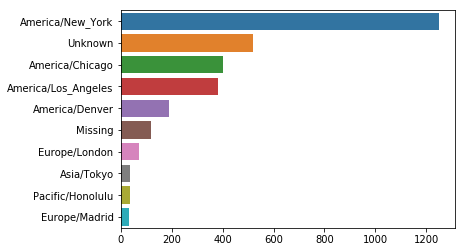

In [131]:
# Now let's make a horizontal bar plot
import seaborn as sns
%matplotlib inline

subset = timezone_counts[:10]

sns.barplot(y=subset.index, x=subset.values)

In [132]:
# The a field contains info about browser, device, or app used to shorten the URL
frame['a'][1]

'GoogleMaps/RochesterNY'

In [133]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [135]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results[:10]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
5               Mozilla/5.0
6               Mozilla/5.0
7               Mozilla/5.0
8                Opera/9.80
9               Mozilla/5.0
dtype: object

In [136]:
# Get the counts
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [137]:
# Now, say we wanted to split the top timezones into Windows and non-Windows
# First, let's exclude missing data
clean_frame = frame[frame.a.notnull()]

In [138]:
# Set a new os column
clean_frame['os'] = np.where(clean_frame['a'].str.contains('Windows'), 'Windows', 'Not Windows')

clean_frame['os'][:5]

C:\Users\Graham\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [142]:
# Then group the data by timezone and os
by_timezone_os = clean_frame.groupby(['tz', 'os'])

# The group counts can be computed with size
by_timezone_os.size().head()

tz                 os         
                   Not Windows    245
                   Windows        276
Africa/Cairo       Windows          3
Africa/Casablanca  Windows          1
Africa/Ceuta       Windows          2
dtype: int64

In [147]:
# Then let's unstack it and fill in nulls
agg_counts = by_timezone_os.size().unstack().fillna(0)
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [151]:
# Finally, let's select the top timezones
# Sum the columns
# Take the largest
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

## 13.2 MovieLens
This dataset contains ratings and other data for movies.

There are three tabls: ratings, user info, and movie info.

In [173]:
# Let's extract the data from a file and load each table into a DataFrame
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movielens/users.dat', sep='::', header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep='::', header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::', header=None, names=mnames)

C:\Users\Graham\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
C:\Users\Graham\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\Graham\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by Interactiv

In [167]:
# Check that it worked
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [164]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [174]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [175]:
# Since it will be easier to calculate stats if everything is in one table,
# we merge the tables.
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [176]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [178]:
# use pivot_table to get mean movie ratings grouped by gender
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [179]:
# Work out the total ratings for each title
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [180]:
# Then get titles with >= 250 ratings
titles_with_250_or_more = ratings_by_title.index[ratings_by_title >= 250]

titles_with_250_or_more

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [182]:
# We can then use this to select mean_ratings for titles >= 250 ratings
mean_ratings = mean_ratings.loc[titles_with_250_or_more]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [185]:
# Get top films among female viewers
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [186]:
# What if you wanted to find movies where the score varied between M and F?
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

sorted_by_diff = mean_ratings.sort_values(by='diff')

sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [187]:
# Reverse the order of the rows and slice off the top 10 to get the movies
# men liked more than women
sorted_by_diff[::-1][:10]


gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [189]:
# What if we wanted the most disagreement regardless of gender?
# Well, that is measured by variance (standard deviation)
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title.loc[titles_with_250_or_more]

rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## 13.3 Baby Names

In [193]:
names1880 = pd.read_csv('datasets/babynames/yob1880.txt', names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [194]:
# Get total births for the year
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [196]:
# The dataset is split into files by year.
# We can put all of the files into one DataTable and add a year column
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
# Concatenate everything into 1 DataFrame
names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [201]:
# Get total births by year
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


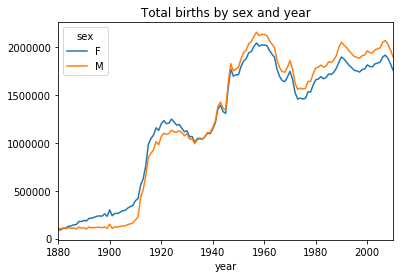

In [202]:
total_births.plot(title='Total births by sex and year')

In [203]:
# Let's add a column prop hat shows the fraction of babies with a given name relative to total births
# E.g., prop 0.02 means 2/100 babies have that name
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [204]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [205]:
# To sanity check, verify the prop column sums to 1 within all the groupbs
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [206]:
# Let's get the top 1000 names for each sex/year combination
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000=grouped.apply(get_top1000)

top1000.reset_index(inplace=True, drop=True)

In [207]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [210]:
# Let's get the top 1,000 M/F names
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2844E57F0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001E294480588>], dtype=object)

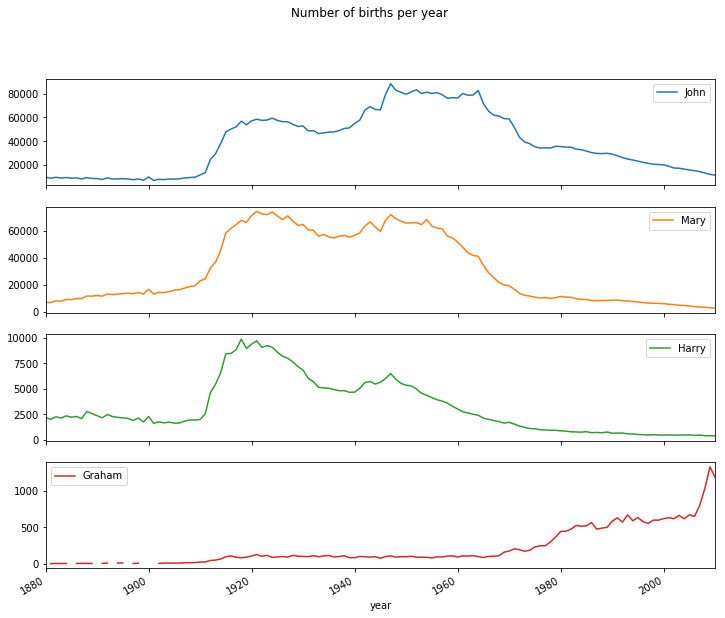

In [212]:
subset = total_births[['John', 'Mary', 'Harry', 'Graham']]

subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

Of course, this doesn't mean the names are less popular, necessarily. It would be that fewer parents are choosing common names.

Let's take a look at the proportion of births represented by the top 1,000 most popular names.

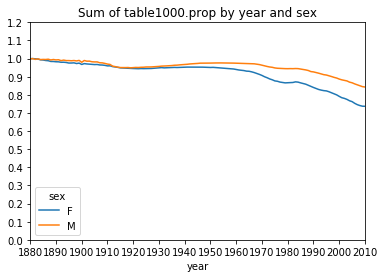

In [213]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

You can see there is increasing name diversity.

## 13.4 USDA food database